# Generative adeversarial networks

-->First we talk about upsampling in neural networks using Upsampling2D and Conv2DTranspose.

-->GAN problems/tips/tricks and tutorials

## Upsampling layers

They quadruple the window size 
Example 5x5 -----> 10x10
i.e. the width and height was both multiplied by 2 thus all in all quadruple
To be useful in a GAN, each
UpSampling2D layer must be followed by a Conv2D layer that will learn to interpret the doubled
input and be trained to translate it into meaningful detail.

In [ ]:
from numpy import asarray
from keras.models import Sequential
from keras.layers import UpSampling2D
# define input data
X = asarray([[1, 2],
[3, 4]])
# show input data for context
print(X)
# reshape input data into one sample a sample with a channel
X = X.reshape((1, 2, 2, 1))
# define model
model = Sequential()
model.add(UpSampling2D(input_shape=(2, 2, 1)))
# summarize the model
# Add interpolation bilinear
#[[1.   1.25 1.75 2.  ]
# [1.5  1.75 2.25 2.5 ]
# [2.5  2.75 3.25 3.5 ]
# [3.   3.25 3.75 4.  ]]
# and without is
#[[1. 1. 2. 2.]
# [1. 1. 2. 2.]
# [3. 3. 4. 4.]
# [3. 3. 4. 4.]]
model.summary()
# make a prediction with the model
yhat = model.predict(X)
# reshape output to remove channel to make printing easier
yhat = yhat.reshape((4, 4))
# summarize output
print(yhat)

[[1 2]
 [3 4]]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
up_sampling2d_2 (UpSampling2 (None, 4, 4, 1)           0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
[[1. 1. 2. 2.]
 [1. 1. 2. 2.]
 [3. 3. 4. 4.]
 [3. 3. 4. 4.]]


## Transpose layers

Performs the upsample operation and interprets the coarse
input data to fill in the detail while it is upsampling. It is like a layer that combines the
UpSampling2D and Conv2D layers into one layer.

The thing to focus on here is the stride of the conv transpose layer.
(3x3 image)

 (stride 1x1) results in a (3x3 image output)
 
 (stride 2x2) results in a (6x6 image output)
 
 (stride 3x3) results in a (9x9 image output) 

In [ ]:
# example of using the transpose convolutional layer
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2DTranspose
# define input data
X = asarray([[1, 2,3],
[3, 4,6],[5,6,7]])
# show input data for context
print(X)
# reshape input data into one sample a sample with a channel
X = X.reshape((1, 3, 3, 1))
# define model
model = Sequential()
model.add(Conv2DTranspose(1, (1,1), strides=(2,2), input_shape=(2, 2, 1)))
# summarize the model
model.summary()
# define weights that they do nothing
weights = [asarray([[[[1]]]]), asarray([0])]
# store the weights in the model
model.set_weights(weights)
# make a prediction with the model
yhat = model.predict(X)
# reshape output to remove channel to make printing easier
yhat = yhat.reshape((6, 6))
print(yhat)

# summarize 

[[1 2 3]
 [3 4 6]
 [5 6 7]]
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_4 (Conv2DTr (None, 4, 4, 1)           2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
[[1. 0. 2. 0. 3. 0.]
 [0. 0. 0. 0. 0. 0.]
 [3. 0. 4. 0. 6. 0.]
 [0. 0. 0. 0. 0. 0.]
 [5. 0. 6. 0. 7. 0.]
 [0. 0. 0. 0. 0. 0.]]


## GAN problems 

*   Model collapse(same output for diff inputs)
*   Model instability(generator/discriminator not converging ever)
*   No way to evaluate during training(cant trust loss) can only trust examples that it produces

## Some Tips
* Replace pooling layers with strided convs(in discriminator) and fractional strided convs(in generator)
* Use batchnorm, remove dense layers(if they are hidden) 
* Use relu activation in generator (except last layers which uses the tanh activation)
* Use leaky relu in discriminator for all

## Problem Identification
* A Stable GAN should have discriminator loss around 0.5-0.8
* While the generator loss can be as high as 2.0
* In case of accuracies a discriminator should clock around at 70-80 percent
* GAN graphs can be erratic so train till 100-300 epochs
* Variance of generator and discriminator loss is expected to remain modest
* The generator is expected to produce its highest quality images during a period of stability
* Training stability may degenerate into periods of high-variance loss and corresponding
lower quality generated images
* Mode collapse is when a latent space results in small variation in generated images.

  1. It can be identified by reviewing the line plot of model loss
  2. Small latent space
  3. It will have good discriminator accuracy while the generator loss is high which suggests that the generator is poor at generating examples in some consistent way that makes it easy for the discriminator to identify the fake images.
  4. Generator model is expected to generate identical output images from different points
in the latent space.

* Convergence failure: Model(s) loss does not settle overtime

  1. Discriminator loss goes to zero but generator loss keeps on increasing(basically means generator outputting garbage images that
the discriminator can easily identify)
  2. One or both models to have
insufficient capacity
  3. Adam optimization algorithm is too aggressive.
  4. Using very large or very small kernel sizes in the models.
  5. Using fake and real images together in a single half batch update can also cause non-convergence 
  6. Loss for the generator rises quickly and continues to rise for the duration of training

## GAN model evaluation

* There is no fixed way of Choosing a final GAN generator model during a training run or Choosing generated images to demonstrate the capability of a GAN generator model or Comparing GAN model architectures or Comparing GAN model configurations.

####Ways to evaluate
* Qualitative Model evaluation(Used when starting out)
  1. Nearest Neighbors.
  2. Rapid Scene Categorization.
  3. Rating and Preference Judgment.
  4. Evaluating Model Drop and Model Collapse.
  5. Investigating and Visualizing the Internals of Networks.
* Quantitative Model evaluation(Used when researching)
  1. Inception Score (IS)
  2. Maximum Mean Discrepancy (MMD)
  3. Classification Performance
  4. Boundary Distortion
  5. Number of Statistically-Different Bins (NDB)
  6. Generative Adversarial Metric (GAM)
  7. Normalized Relative Discriminative Score (NRDS)
  8. Adversarial Accuracy and Adversarial Divergence
  9. Reconstruction Error
  10. Image Quality Measures (SSIM, PSNR and Sharpness Difference)
  11. Precision, Recall and F1 Score
  12. FID score defines statistical distance between images












   ### Downsampling using strided convs
* Discriminator is a normal CNN model performing binary classification(real or fake) 
* It is recommended to use convs for downsampling i.e normal conv layer with (2,2) stride instead of (1,1)

### Upsample using strided convs
* Thee generator uses upsampling to produce a valid image from a latent space input
* The plan goes like: stacking strided conv layers with a single hidden transpose

In [ ]:
# example of downsampling with strided convolutions
from keras.models import Sequential
from keras.layers import Conv2D
# define model
model = Sequential()
model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=(64,64,3)))
# summarize model
model.summary()

In [ ]:
# example of upsampling with strided convolutions
from keras.models import Sequential
from keras.layers import Conv2DTranspose
# define model
model = Sequential()
model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same', input_shape=(64,64,3)))
# summarize model
model.summary()

### Leaky relu
* Being used in the generator but can bring improvements if used in both

### Batch norm
* used after activation of conv and transpose conv or before(rarely)

### Gaussian weight initialization
* Std =0.02 and mean =0

### ADAM SGD
* Use lr = 0.0002 and beta1 =0.5

### Image preprocessing
* scale images to (-1.1)
ie pixel values range from -1 to 1 only

### Gaussian latent space
* Latent space refers to the distribution of input to the generator(to generate new images) use gaussian with mean=0 and std=1

### Separate batches of fake and real
* Two different weight updates(using train_on_batch()) so that real and fake images are separate

### Label smoothing
* Generally labels are strict ex 1 for real 0 for fake these are called hard labels. Slight inc or dec in 0 or 1 for fake and real can have regularizing effect.

### Use noisy labels
*  If you are using separate batches to update the discriminator for real and fake images, this may mean randomly adding some fake images to the batch of real images, or randomly adding some real images to the batch of fake images. If you are updating the discriminator with a combined batch of real and fake images, then this may involve randomly flipping the labels on some images.

In [ ]:
# example of using leakyrelu in a discriminator model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import LeakyReLU
# define model
model = Sequential()
model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=(64,64,3)))
model.add(LeakyReLU(0.2))
# summarize model
model.summary()

In [ ]:
# example of using batch norm in a discriminator model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
# define model
model = Sequential()
model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(LeakyReLU(0.2))
# summarize model
model.summary()

In [ ]:
# example of gaussian weight initialization in a generator model
from keras.models import Sequential
from keras.layers import Conv2DTranspose
from keras.initializers import RandomNormal
# define model
model = Sequential()
init = RandomNormal(mean=0.0, stddev=0.02)
model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same',
kernel_initializer=init, input_shape=(64,64,3)))

In [ ]:
# example of using adam when training a discriminator model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.optimizers import Adam
# define model
model = Sequential()
model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=(64,64,3)))
# compile model
opt = Adam(lr=0.0002, beta_1=0.5)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])


In [ ]:
# example of a function for scaling images
from numpy.random import randint
# scale image data from [0,255] to [-1,1]
def scale_images(images):
  # convert from unit8 to float32
  images = images.astype('float32')
  # scale from [0,255] to [-1,1]
  images = (images - 127.5) / 127.5
  return images
# define one 28x28 color image
images = randint(0, 256, 28 * 28 * 3)
images = images.reshape((1, 28, 28, 3))
# summarize pixel values
print(images.min(), images.max())
# scale
scaled = scale_images(images)
# summarize pixel scaled values
print(scaled.min(), scaled.max())


In [ ]:
# example of sampling from a gaussian latent space
from numpy.random import randn
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape((n_samples, latent_dim))
  return x_input
# size of latent space
n_dim = 100
# number of samples to generate
n_samples = 500
# generate samples
samples = generate_latent_points(n_dim, n_samples)
# summarize
print(samples.shape, samples.mean(), samples.std())

In [ ]:
# ...
# # get randomly selected ✬real✬ samples
# X_real, y_real = ...
# # update discriminator model weights
# discriminator.train_on_batch(X_real, y_real)
# # generate ✬fake✬ examples
# X_fake, y_fake = ...
# # update discriminator model weights
# discriminator.train_on_batch(X_fake, y_fake)


In [ ]:
# example of positive label smoothing
from numpy import ones
from numpy.random import random
# example of smoothing class=1 to [0.7, 1.2]
def smooth_positive_labels(y):
  return y - 0.3 + (random(y.shape) * 0.5)
# generate ✬real✬ class labels (1)
n_samples = 1000
y = ones((n_samples, 1))
print("Before",y.shape, y.min(), y.max())
# smooth labels
y = smooth_positive_labels(y)
# summarize smooth labels
print("Before",y.shape, y.min(), y.max())

##########################################

# example of negative label smoothing
from numpy import zeros
from numpy.random import random
# example of smoothing class=0 to [0.0, 0.3]
def smooth_negative_labels(y):
  return y + random(y.shape) * 0.3
# generate ✬fake✬ class labels (0)
n_samples = 1000
y = zeros((n_samples, 1))
# smooth labels
y = smooth_negative_labels(y)
# summarize smooth labels
print(y.shape, y.min(), y.max())

In [ ]:
# example of noisy labels
from numpy import ones
from numpy import zeros
from numpy.random import choice
# randomly flip some labels
def noisy_labels(y, p_flip):
  # determine the number of labels to flip
  n_select = int(p_flip * y.shape[0])
  # choose labels to flip
  flip_ix = choice([i for i in range(y.shape[0])], size=n_select)
  # invert the labels in place
  y[flip_ix] = 1 - y[flip_ix]
  return y
# generate ✬real✬ class labels (1)
n_samples = 1000
y = ones((n_samples, 1))
# flip labels with 5% probability
y = noisy_labels(y, 0.05)
# summarize labels
print(y.sum())
# generate ✬fake✬ class labels (0)
y = zeros((n_samples, 1))
# flip labels with 5% probability
y = noisy_labels(y, 0.05)
# summarize labels
print(y.sum())


### 1D GAN
* We will create a GAN that generates new examples for the addition function

* DISCRIMINATOR : The model must take a sample from our problem, such as a vector with two elements, and output a classification prediction as to whether the sample is real or fake. 

1.   This is a binary classification problem.Inputs: Sample with two real values 
2.   Outputs: Binary classification, likelihood the sample is real (or fake).

* GENERATOR : The generator model takes as input a point from the latent space and generates a new sample, e.g. a vector with both the input and output elements of our function, e.g. x and 2x.


1.   Inputs: Point in latent space, e.g. a five-element vector of Gaussian random numbers
2. Outputs: Two-element vector representing a generated sample for our function (x and x2).





In [ ]:
# define the discriminator model
from numpy import zeros
from numpy import ones
from numpy import hstack
from numpy.random import rand
from keras.models import Sequential
from keras.layers import Dense

# define the standalone discriminator model
def define_discriminator(n_inputs=2):
  model = Sequential()
  model.add(Dense(25, activation='relu', kernel_initializer='he_uniform',input_dim=n_inputs))
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model = define_discriminator()
# summarize the model
print(model.summary())

# generate n real samples with class labels(as you can see it generates x1 * x1 thus its real)
def generate_real_samples(n):
  # generate inputs in [-0.5, 0.5]
  X1 = rand(n) - 0.5
  # generate outputs X^2
  X2 = X1 * X1
  # stack arrays
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = hstack((X1, X2))
  # generate class labels
  y = ones((n, 1))
  return X, y

# generate n fake samples with class labels
def generate_fake_samples(n):
  # generate inputs in [-1, 1]
  X1 = -1 + rand(n) * 2
  # generate outputs in [-1, 1]
  X2 = -1 + rand(n) * 2
  # stack arrays
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = hstack((X1, X2))
  # generate class labels
  y = zeros((n, 1))
  return X, y

# train the discriminator model (we can see this function trains on each batch for n epochs
# batch size is 128 thus 64 real and 64 fake)
def train_discriminator(model, n_epochs=1000, n_batch=128):
  half_batch = int(n_batch / 2)
  # run epochs manually
  for i in range(n_epochs):
    # generate real examples
    X_real, y_real = generate_real_samples(half_batch)
    # update/train model on real
    model.train_on_batch(X_real, y_real)
    # generate fake examples
    X_fake, y_fake = generate_fake_samples(half_batch) # This is only for example 
    # generally this is the generators job to generate fake samples
    # update/train model on fake
    model.train_on_batch(X_fake, y_fake)
    # evaluate the model
    _, acc_real = model.evaluate(X_real, y_real, verbose=0) ## calculate prediction accuracy for real
    _, acc_fake = model.evaluate(X_fake, y_fake, verbose=0) ## calculate prediction accuracy for fake(this loss/accuracy is 
    # later propagated through the generator model so that it can be updated)
    print("Epoch: ",i,"Accuracy on predicting real: ",acc_real,"Accuracy on predicting fake: ",acc_fake)

# define the discriminator model
model = define_discriminator()
# fit the model
train_discriminator(model)



In [ ]:
#The generator model is not compiled. The reason for this is that the generator model is not fit directly.
#The define generator() function below defines and returns the generator model. The size of
#the latent dimension is parameterized in case we want to play with it later, and the output
#shape of the model is also parameterized, matching the function for defining the discriminator model.

# define the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
# define and use the generator model
from numpy.random import randn
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot
# define the standalone generator model
def define_generator(latent_dim, n_outputs=2):
  model = Sequential()
  model.add(Dense(15, activation='relu', kernel_initializer='he_uniform',input_dim=latent_dim))
  model.add(Dense(n_outputs, activation='linear'))
  return model

# define the discriminator model
model = define_generator(5)
# summarize the model
print(model.summary())

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
  # generate points in the latent space
  x_input = randn(latent_dim * n)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n, latent_dim)
  return x_input

# use the generator to generate n fake examples and plot the results
def generate_fake_samples(generator, latent_dim, n):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n)
  # predict outputs
  X = generator.predict(x_input)
  # plot the results
  pyplot.scatter(X[:, 0], X[:, 1])
  pyplot.show() 
  
# size of the latent space
latent_dim = 5
# define the discriminator model
model = define_generator(latent_dim)
# generate and plot generated samples
generate_fake_samples(model, latent_dim, 100)


In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
  # make weights in the discriminator not trainable
  discriminator.trainable = False
  # connect them
  model = Sequential()
  # add generator
  model.add(generator)
  # add the discriminator
  model.add(discriminator)
  # compile model
  model.compile(loss='binary_crossentropy', optimizer='adam')
  return model

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# summarize gan model
print(gan_model.summary())

# train the composite model
def train_gan(gan_model, latent_dim, n_epochs=10000, n_batch=128):
  # manually enumerate epochs
  for i in range(n_epochs):
  # prepare points in latent space as input for the generator
  x_gan = generate_latent_points(latent_dim, n_batch)
  # create inverted labels for the fake samples
  y_gan = ones((n_batch, 1))
  # update the generator via the discriminator✬s error
  gan_model.train_on_batch(x_gan, y_gan)



In [ ]:
# generate n real samples with class labels
def generate_real_samples(n):
  # generate inputs in [-0.5, 0.5]
  X1 = rand(n) - 0.5
  # generate outputs X^2
  X2 = X1 * X1
  # stack arrays
  X1 = X1.reshape(n, 1)
  X2 = X2.reshape(n, 1)
  X = hstack((X1, X2))
  # generate class labels
  y = ones((n, 1))
  return X, y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
  # generate points in the latent space
  x_input = randn(latent_dim * n)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n, latent_dim)
  return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n)
  # predict outputs
  X = generator.predict(x_input)
  # create class labels
  y = zeros((n, 1))
  return X, y

# plot real and fake points
def summarize_performance(generator, latent_dim, n=100):
  # prepare real samples
  x_real, y_real = generate_real_samples(n)
  # evaluate discriminator on real examples
  _, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
  # prepare fake examples
  x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
  # evaluate discriminator on fake examples
  _, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
  # summarize discriminator performance
  print("Epoch: ",i,"Accuracy on predicting real: ",acc_real,"Accuracy on predicting fake: ",acc_fake)
  # scatter plot real and fake data points
  pyplot.scatter(x_real[:, 0], x_real[:, 1], color='red')
  pyplot.scatter(x_fake[:, 0], x_fake[:, 1], color='blue')
  # save plot to file
  filename = 'generated_plot_e%03d.png' % (epoch+1)
  pyplot.savefig(filename)
  pyplot.close()

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
  # determine half the size of one batch, for updating the discriminator
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # prepare real samples
    x_real, y_real = generate_real_samples(half_batch)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # update discriminator
    d_model.train_on_batch(x_real, y_real)
    d_model.train_on_batch(x_fake, y_fake)
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    # create inverted labels for the fake samples
    y_gan = ones((n_batch, 1))
    # update the generator via the discriminator✬s error
    gan_model.train_on_batch(x_gan, y_gan)
    # evaluate the model every n_eval epochs
    if (i+1) % n_eval == 0:
      summarize_performance(i, g_model, d_model, latent_dim)

# size of the latent space
latent_dim = 5
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

## DCGAN for Grayscale Handwritten Digits

* The discriminator takes 28x28x1 images as input and ouputs whether the image is real or fake.


In [ ]:
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets import mnist
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU

# discriminator expects a 3D array so make sure to convert images into 3d arrays 
#i.e expand 1 dimension additionally convert to float32 and normalize by dividing 
#by 255. Use the following function
def load_real_samples():
  (trainX,_),(_,_) = mnist.load_data()
  X= expand_dims(trainX,axis=-1)
  X=X.astype('float32')
  X=X/255.0
  return X

# select real samples(pass the dataset and it will generate batches of data for you)
# along with the target vector which is one since its real examples
def generate_real_samples(dataset, n_samples):
  # choose random instances
  ix = randint(0, dataset.shape[0], n_samples)
  # retrieve selected images
  X = dataset[ix]
  # generate ✬real✬ class labels (1)
  y = ones((n_samples, 1))
  return X, y

# since the real data is normalizaed we rnadomly generate numbers in the range(0,1)
# amount is 28x28x no of samples required(generally is half of the batch size)
# then reshape them into (no.of samples,width,height,no.of channels)
def generate_fake_samples(n_samples):
  # generate uniform random numbers in [0,1]
  X = rand(28 * 28 * n_samples)
  # reshape into a batch of grayscale images
  X = X.reshape((n_samples, 28, 28, 1))
  # generate ✬fake✬ class labels (0)
  y = zeros((n_samples, 1))
  return X, y

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
  model = Sequential()
  model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Conv2D(64, (3,3), strides=(2, 2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.4))
  model.add(Flatten())
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

model = define_discriminator()
print(model.summary())

# train the discriminator model
def train_discriminator(model, dataset, n_iter=100, n_batch=256):
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_iter):
    # get randomly selected ✬real✬ samples
    X_real, y_real = generate_real_samples(dataset, half_batch)
    # update discriminator on real samples
    _, real_acc = model.train_on_batch(X_real, y_real)
    # generate ✬fake✬ examples
    X_fake, y_fake = generate_fake_samples(half_batch)
    # update discriminator on fake samples
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    # summarize performance
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

# define the discriminator model
model = define_discriminator()
# load image data
dataset = load_real_samples()
# fit the model
train_discriminator(model, dataset)


In [ ]:
# example of defining the generator model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.utils.vis_utils import plot_model
# define the standalone generator model
def define_generator(latent_dim):
  model = Sequential()
  # foundation for 7x7 image
  n_nodes = 128 * 7 * 7
  model.add(Dense(n_nodes, input_dim=latent_dim)) # takes 100 random vars as input
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((7, 7, 128))) # shape changes to 7,7,128
  # upsample to 14x14
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')) # 14,14,128
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 28x28
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')) #28,28,128
  model.add(LeakyReLU(alpha=0.2))
  model.add(Conv2D(1, (7,7), activation='sigmoid', padding='same')) #28,28,1
  return model

# define the size of the latent space
latent_dim = 100
# define the generator model
model = define_generator(latent_dim)
# summarize the model
print(model.summary())

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):  
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)    # Generate 100x128 random points
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim) # reshape into 128 diff points
  # with 100 dims i.e 128 rows each row has 100 cols
  return x_input

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  X = g_model.predict(x_input)
  # create ✬fake✬ class labels (0)
  y = zeros((n_samples, 1))
  return X, y

# size of the latent space
latent_dim = 100
# define the discriminator model
model = define_generator(latent_dim)
# generate samples
n_samples = 25
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# plot the generated samples
for i in range(n_samples):
  # define subplot
  pyplot.subplot(5, 5, 1 + i)
  # turn off axis labels
  pyplot.axis('off')
  # plot single image
  pyplot.imshow(X[i, :, :, 0], cmap='gray_r')

# show the figure
pyplot.show()

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
  # make weights in the discriminator not trainable
  d_model.trainable = False
  # connect them
  model = Sequential()
  # add generator
  model.add(g_model)
  # add the discriminator
  model.add(d_model)
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
print(gan_model.summary())


In [ ]:
# example of training a gan on mnist
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=100):
  # prepare real samples
  X_real, y_real = generate_real_samples(dataset, n_samples)
  # evaluate discriminator on real examples
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
  # prepare fake examples
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  # evaluate discriminator on fake examples
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
  # summarize discriminator performance
  print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
      # get randomly selected ✬real✬ samples
      X_real, y_real = generate_real_samples(dataset, half_batch)
      # generate ✬fake✬ examples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      # create training set for the discriminator
      X, y = vstack((X_real, X_fake)), vstack((y_real, y_fake))
      # update discriminator model weights
      d_loss, _ = d_model.train_on_batch(X, y)
      # prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan = ones((n_batch, 1))
      # update the generator via the discriminator✬s error
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      # summarize loss on this batch
      print(✬>%d, %d/%d, d=%.3f, g=%.3f✬ % (i+1, j+1, bat_per_epo, d_loss, g_loss))
    if (i+1) % 10 == 0:
      summarize_performance(i, g_model, d_model, dataset, latent_dim)

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)



In [ ]:
# create and save a plot of generated images (reversed grayscale)
def save_plot(examples, n):
  # plot images
  for i in range(n * n):
    # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
    pyplot.show()

# load model
model = load_model('generator_model_100.h5')
# generate images
latent_points = generate_latent_points(100, 25)
# generate images
X = model.predict(latent_points)
# plot the result
save_plot(X, 5)


## CIFAR-10 GAN

In [ ]:
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from numpy.random import randn
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU
from keras.layers import Conv2DTranspose
from keras.layers import Reshape
from matplotlib import pyplot
%matplotlib inline


# define the standalone discriminator model
def define_discriminator(in_shape=(32,32,3)):
  model = Sequential()
  # normal
  model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  # downsample
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # downsample
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # downsample
  model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # classifier
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

# load and prepare cifar10 training images
def load_real_samples():
  # load cifar10 dataset
  (trainX, _), (_, _) = load_data()
  # convert from unsigned ints to floats
  X = trainX.astype('float32')
  # scale from [0,255] to [-1,1]
  X = (X - 127.5) / 127.5
  return X

# select real samples
def generate_real_samples(dataset, n_samples):
  # choose random instances
  ix = randint(0, dataset.shape[0], n_samples)
  # retrieve selected images
  X = dataset[ix]
  # generate ✬real✬ class labels (1)
  y = ones((n_samples, 1))
  return X, y

# generate n fake samples with class labels# USED UNTIL THE GENERATOR MODEL IS UNDEFINED
# def generate_fake_samples(n_samples):
#   # generate uniform random numbers in [0,1]
#   X = rand(32 * 32 * 3 * n_samples)
#   # update to have the range [-1, 1]
#   X = -1 + X * 2
#   # reshape into a batch of color images
#   X = X.reshape((n_samples, 32, 32, 3)) 
#   # generate ✬fake✬ class labels (0)
#   y = zeros((n_samples, 1))
#   return X, y

# train the discriminator model
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_iter):
    # get randomly selected ✬real✬ samples
    X_real, y_real = generate_real_samples(dataset, half_batch)
    # update discriminator on real samples
    _, real_acc = model.train_on_batch(X_real, y_real)
    # generate ✬fake✬ examples
    X_fake, y_fake = generate_fake_samples(half_batch)
    # update discriminator on fake samples
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    # summarize performance
    #print('✬>%d Real Accuracy=%.0f%% Fake Accuracy=%.0f%%✬' % (i+1, real_acc*100, fake_acc*100))

def define_generator(latent_dim):
  model = Sequential()
  # foundation for 4x4 image
  n_nodes = 256 * 4 * 4
  model.add(Dense(n_nodes, input_dim=latent_dim)) 
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4, 4, 256)))
  # upsample to 8x8
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 16x16
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 32x32
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # output layer
  model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
  return model

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input
  # use the generator to generate n fake examples, with class labels

def generate_fake_samples(g_model, latent_dim, n_samples):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  X = g_model.predict(x_input)
  # create ✬fake✬ class labels (0)
  y = zeros((n_samples, 1))
  return X, y

# evaluate the discriminator, plot generated images, save generator model
def summarize_performance(i, g_model, d_model, dataset, latent_dim, n_samples=150):
  # prepare real samples
  X_real, y_real = generate_real_samples(dataset, n_samples)
  # evaluate discriminator on real examples
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
  # prepare fake examples
  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  # evaluate discriminator on fake examples
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)
  # summarize discriminator performance
  print('✬>%d Real Accuracy=%.0f%% Fake Accuracy=%.0f%%✬' % (i+1, acc_real*100, acc_fake*100))

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
  # make weights in the discriminator not trainable
  d_model.trainable = False
  # connect them
  model = Sequential()
  # add generator
  model.add(g_model)
  # add the discriminator
  model.add(d_model)
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

# create and save a plot of generated images
def save_plot(examples, n):
  # plot images
  for i in range(n * n):
    # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i, :, :])
  pyplot.show()

def plot_history(d1_hist, d2_hist, g_hist, a1_hist, a2_hist):
  # plot loss
  pyplot.subplot(2, 1, 1)
  pyplot.plot(d1_hist, label='d-real')
  pyplot.plot(d2_hist, label='d-fake')
  pyplot.plot(g_hist, label='gen')
  pyplot.legend()
  # plot discriminator accuracy
  pyplot.subplot(2, 1, 2)
  pyplot.plot(a1_hist, label='acc-real')
  pyplot.plot(a2_hist, label='acc-fake')
  pyplot.legend()
  # save plot to file
  #pyplot.savefig(✬results_baseline/plot_line_plot_loss.png✬)
  pyplot.close()

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=256):
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  d1_hist, d2_hist, g_hist, a1_hist, a2_hist = list(), list(), list(), list(), list()
  # manually enumerate epochs
  for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
    # get randomly selected ✬real✬ samples
      X_real, y_real = generate_real_samples(dataset, half_batch)
      # update discriminator model weights
      d_loss1, d_acc1 = d_model.train_on_batch(X_real, y_real)
      # generate ✬fake✬ examples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      # update discriminator model weights
      d_loss2, d_acc2 = d_model.train_on_batch(X_fake, y_fake)
      # prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan = ones((n_batch, 1))
      # update the generator via the discriminator✬s error
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      # summarize loss on this batch
      d1_hist.append(d_loss1)
      d2_hist.append(d_loss2)
      g_hist.append(g_loss)
      a1_hist.append(d_acc1)
      a2_hist.append(d_acc2)
      print('✬>Epoch: %d,%d/%d (Current Batch / Total Batches), Real Loss: d1=%.3f, Fake Loss: d2=%.3f, Generator Loss: g=%.3f<✬' % (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
    if (i+1) % 10 == 0:
      summarize_performance(i, g_model, d_model, dataset, latent_dim)
    if (i+1) % 25 == 0:
      latent_points = generate_latent_points(100, 100)
      interim = g_model.predict(latent_points)
      #interim = (interim + 1) / 2.0
      #interim = (interim + 1) / 2.0
      # plot the result
      save_plot(interim, 3)
      plot_history(d1_hist, d2_hist, g_hist, a1_hist, a2_hist)



# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
print("Discriminator Model Summary",d_model.summary())
# create the generator
g_model = define_generator(latent_dim)
print("Generator Model Summary",g_model.summary())
# create the gan
gan_model = define_gan(g_model, d_model)
# summarize gan model
print("Full GAN Model Summary",gan_model.summary())
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)



## GAN evaluation
### Inception Score
The inception score is calculated by first using a pre-trained Inception v3 model to predict the class probabilities for each generated image. These are conditional probabilities, e.g. class label conditional on the generated image. Images that are classified strongly as one class over all other classes indicate a high quality.
* It needs images to be 300x300
* It is only useful when classes closely resemble the model it is trained on.

### FID score
 The inception score does not capture how synthetic images compare to real
images. The goal in developing the FID score was to evaluate synthetic images based on the
statistics of a collection of synthetic images compared to the statistics of a collection of real images from the target domain.  A lower FID indicates better-quality images; conversely, a higher score indicates a lower-quality image and the relationship may be linear. It is basically real images inception score vs generated images inception score.
* Last layer form inception removed and global max pooling is used.
* Resizing required




In [ ]:
# calculate inception score with Keras
from math import floor
from numpy import ones
from numpy import expand_dims
from numpy import log
from numpy import mean
from numpy import std
from numpy import exp
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input

def scale_images(images, new_shape):
  images_list = list()
  for image in images:
    # resize with nearest neighbor interpolation
    new_image = resize(image, new_shape, 0)
    # store
    images_list.append(new_image)
  return asarray(images_list)
# assumes images have the shape 299x299x3, pixels in [0,255]
def calculate_inception_score(images, n_split=10, eps=1E-16):
  # load inception v3 model
  model = InceptionV3()
  # convert from uint8 to float32
  processed = images.astype('float32')
  # pre-process raw images for inception v3 model
  processed = preprocess_input(processed)
  # predict class probabilities for images
  yhat = model.predict(processed)
  # enumerate splits of images/predictions
  scores = list()
  n_part = floor(images.shape[0] / n_split)
  for i in range(n_split):
    ix_start, ix_end = i * n_part, (i+1) * n_part
    subset = images[ix_start:ix_end]
    # convert from uint8 to float32
    subset = subset.astype('float32')
    # scale images to the required size
    subset = scale_images(subset, (299,299,3))
    # pre-process images, scale to [-1,1]
    subset = preprocess_input(subset)
    # predict p(y|x)
    p_yx = model.predict(subset)
    # calculate p(y)
    p_y = expand_dims(p_yx.mean(axis=0), 0)
    # calculate KL divergence using log probabilities
    kl_d = p_yx * (log(p_yx + eps) - log(p_y + eps))
    # sum over classes
    sum_kl_d = kl_d.sum(axis=1)
    # average over images
    avg_kl_d = mean(sum_kl_d)
    # undo the log
    is_score = exp(avg_kl_d)
    # store
    scores.append(is_score)
  # average across images
  is_avg, is_std = mean(scores), std(scores)
  return is_avg, is_std

# load cifar10 images
(images, _), (_, _) = cifar10.load_data()
# shuffle images
shuffle(images)
# scale an array of images to a new size
print('loaded', images.shape)
# calculate inception score
is_avg, is_std = calculate_inception_score(images)
print('score', is_avg, is_std)





In [ ]:
# example of calculating the frechet inception distance in Keras
import numpy
from numpy import cov
from numpy import trace
from numpy import iscomplexobj
from numpy import asarray
from numpy.random import randint
from scipy.linalg import sqrtm
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from skimage.transform import resize
from keras.datasets import cifar10

# scale an array of images to a new size
def scale_images(images, new_shape):
  images_list = list()
  for image in images:
    # resize with nearest neighbor interpolation
    new_image = resize(image, new_shape, 0)
    # store
    images_list.append(new_image)
  return asarray(images_list)

# calculate frechet inception distance
def calculate_fid(model, images1, images2):
  # calculate activations
  act1 = model.predict(images1)
  act2 = model.predict(images2)
  # calculate mean and covariance statistics
  mu1, sigma1 = act1.mean(axis=0), cov(act1, rowvar=False)
  mu2, sigma2 = act2.mean(axis=0), cov(act2, rowvar=False)
  # calculate sum squared difference between means
  ssdiff = numpy.sum((mu1 - mu2)**2.0)
  # calculate sqrt of product between cov
  covmean = sqrtm(sigma1.dot(sigma2))
  # check and correct imaginary numbers from sqrt
  if iscomplexobj(covmean):
    covmean = covmean.real
    # calculate score
  fid = ssdiff + trace(sigma1 + sigma2 - 2.0 * covmean)
  return fid

# prepare the inception v3 model
model = InceptionV3(include_top=False, pooling='avg', input_shape=(299,299,3))
# define two fake collections of images
images1 = randint(0, 255, 10*32*32*3)
images1 = images1.reshape((10,32,32,3))
images2 = randint(0, 255, 10*32*32*3)
images2 = images2.reshape((10,32,32,3))
print('Prepared', images1.shape, images2.shape)
# convert integer to floating point values
images1 = images1.astype('float32')
images2 = images2.astype('float32')
# resize images
images1 = scale_images(images1, (299,299,3))
images2 = scale_images(images2, (299,299,3))
print('Scaled', images1.shape, images2.shape)
# pre-process images
images1 = preprocess_input(images1)
images2 = preprocess_input(images2)
# fid between images1 and images1
fid = calculate_fid(model, images1, images1)
print('FID (same): %.3f' % fid)
# fid between images1 and images2
fid = calculate_fid(model, images1, images2)
print('FID (different): %.3f' % fid)

(cifar1, _), (cifar2, _) = cifar10.load_data()
shuffle(cifar1)
cifar1 = cifar1[:10000]
print('Loaded', cifar1.shape, cifar2.shape)
# convert integer to floating point values
cifar1 = cifar1.astype('float32')
cifar2 = cifar2.astype('float32')
# resize images
cifar1 = scale_images(cifar1, (299,299,3))
cifar2 = scale_images(cifar2, (299,299,3))
print('Scaled', cifar1.shape, cifar2.shape)
# pre-process images
cifar1 = preprocess_input(cifar1)
cifar2 = preprocess_input(cifar2)
# calculate fid
fid = calculate_fid(model, cifar1, cifar2)
print('FID: %.3f' % fid)



## GAN Loss
 1. Minimax GAN Loss:
  * Simultaneous optimization of the discriminator and generator model(min of gen max of disc)
  * In practice,loss function may not provide sufficient gradient for G to learn. Early in learning, D can reject samples with high confidence
because they are different from the training data
 2. Non-saturating GAN Loss
  * The Non-Saturating GAN Loss is a modification to the generator loss to overcome the saturation
problem.
  * This is a change in the framing of the problem. In the previous case, the generator sought to minimize the probability of images being predicted as fake. Here, the generator seeks to maximize the probability of images being predicted as real.

 P.S Under both schemes the discriminator seeks to maximize the probability assigned to real and fake images
 3. Alternate loss functions
   1. Least squares: Solves probelms of binary crossentropy but results in the vanishing gradient.
     * The discriminator seeks to minimize the sum squared difference between predicted and expected values for real and fake images. The generator seeks to minimize the sum squared difference between predicted and expected values as though the generated images were real.
     * LSGAN solves vanishing gradient and loss saturation by using least square or L2 loss.the least squares loss will penalize generated images based on their distance from the decision boundary. Use MSE loss, disc last layer is a linear activation function, VGG architecture used.
  2. Wasserstein Loss: Calculates the distance between two probability distributions in terms of the cost of turning one distribution into another. Example turning real into fake.
      * Wasserstein loss involves changing the notion of the discriminator into a critic that is updated more often (e.g. five times more often) than the generator model.
      * WGAN improves stability by WGAN changing or replacing the discriminator
model with a critic that scores the realness or fakeness of a given image. This is unlike the discriminator model of the DCGAN that, once trained, may fail to provide useful gradient information for updating the generator model. The benefit of the WGAN is that the training process is more stable and less sensitive to model architecture and choice of hyperparameter configurations.
      * Linear activation in last layer of critic, -1 for real and 1 for real, wassertain loss for training, constrain the weights to [-0.01,0.01], update critic more than generator, rmsprop instead of SGD with small learning rate and no momentum

1. LSGAN
2. WSGAN


In [ ]:
# example of lsgan for mnist
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import Activation
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.initializers import RandomNormal
from matplotlib import pyplot

def define_discriminator(in_shape=(28,28,1)):
  # weight initialization
  init = RandomNormal(stddev=0.02)
  # define model
  model = Sequential()
  # downsample to 14x14
  model.add(Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init,
  input_shape=in_shape))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  # downsample to 7x7
  model.add(Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  # classifier
  model.add(Flatten())
  model.add(Dense(1, activation='linear', kernel_initializer=init))
  # compile model with L2 loss
  model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5))
  return model

# define the standalone generator model
def define_generator(latent_dim):
  # weight initialization
  init = RandomNormal(stddev=0.02)
  # define model
  model = Sequential()
  # foundation for 7x7 image
  n_nodes = 256 * 7 * 7
  model.add(Dense(n_nodes, kernel_initializer=init, input_dim=latent_dim))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Reshape((7, 7, 256)))
  # upsample to 14x14
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same',kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # upsample to 28x28
  model.add(Conv2DTranspose(64, (4,4), strides=(2,2), padding='same',kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  # output 28x28x1
  model.add(Conv2D(1, (7,7), padding='same', kernel_initializer=init))
  model.add(Activation('tanh'))
  return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
  # make weights in the discriminator not trainable
  discriminator.trainable = False
  # connect them
  model = Sequential()
  # add generator
  model.add(generator)
  # add the discriminator
  model.add(discriminator)
  # compile model with L2 loss
  model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5))
  return model

# load mnist images
def load_real_samples():
  # load dataset
  (trainX, _), (_, _) = load_data()
  # expand to 3d, e.g. add channels
  X = expand_dims(trainX, axis=-1)
  # convert from ints to floats
  X = X.astype('float32')
  # scale from [0,255] to [-1,1]
  X = (X - 127.5) / 127.5
  return X
# # select real samples
def generate_real_samples(dataset, n_samples):
  # choose random instances
  ix = randint(0, dataset.shape[0], n_samples)
  # select images
  X = dataset[ix]
  # generate class labels
  y = ones((n_samples, 1))
  return X, y
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  X = generator.predict(x_input)
  # create class labels
  y = zeros((n_samples, 1))
  return X, y
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, latent_dim, n_samples=100):
  # prepare fake examples
  X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
  # scale from [-1,1] to [0,1]
  X = (X + 1) / 2.0
  # plot images
  for i in range(10 * 10):
    # define subplot
    pyplot.subplot(10, 10, 1 + i)
    15.3. How to Develop an LSGAN for MNIST 298
    # turn off axis
    pyplot.axis(✬off✬)
    # plot raw pixel data
    pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
  # save plot to file
  #filename1 = ✬generated_plot_%06d.png✬ % (step+1)
  #pyplot.savefig(filename1)
  pyplot.close()
  # save the generator model
  #filename2 = ✬model_%06d.h5✬ % (step+1)
  #g_model.save(filename2)
  #print(✬Saved %s and %s✬ % (filename1, filename2))

# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

# create a plot of generated images (reversed grayscale)
def plot_generated(examples, n):
  # plot images
  for i in range(n * n):
    # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
  pyplot.show()

def plot_history(d1_hist, d2_hist, g_hist):
  # plot history
  pyplot.plot(d1_hist, label='crit_real')
  pyplot.plot(d2_hist, label='crit_fake')
  pyplot.plot(g_hist, label='gen')
  pyplot.legend()
  pyplot.savefig('plot_line_plot_loss.png')
  pyplot.close()


# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=20, n_batch=64):
# calculate the number of batches per training epoch
  bat_per_epo = int(dataset.shape[0] / n_batch)
  # calculate the number of training iterations
  n_steps = bat_per_epo * n_epochs
  # calculate the size of half a batch of samples
  half_batch = int(n_batch / 2)
  # lists for storing loss, for plotting later
  d1_hist, d2_hist, g_hist = list(), list(), list()
  # manually enumerate epochs
  for i in range(n_steps):
    # prepare real and fake samples
    X_real, y_real = generate_real_samples(dataset, half_batch)
    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # update discriminator model
    d_loss1 = d_model.train_on_batch(X_real, y_real)
    d_loss2 = d_model.train_on_batch(X_fake, y_fake)
    # update the generator via the discriminator✬s error
    z_input = generate_latent_points(latent_dim, n_batch)
    y_real2 = ones((n_batch, 1))
    g_loss = gan_model.train_on_batch(z_input, y_real2)
    # summarize loss on this batch
    print(✬>%d, d1=%.3f, d2=%.3f g=%.3f✬ % (i+1, d_loss1, d_loss2, g_loss))
    # record history
    d1_hist.append(d_loss1)
    d2_hist.append(d_loss2)
    g_hist.append(g_loss)
    # evaluate the model performance every ✬epoch✬
    if (i+1) % (bat_per_epo * 1) == 0:
      summarize_performance(i, g_model, latent_dim)
      latent_points = generate_latent_points(100, 100)
      X = g_model.predict(latent_points)
      plot_generated(X, 10)

  # create line plot of training history
  plot_history(d1_hist, d2_hist, g_hist)

# size of the latent space
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# load image data
dataset = load_real_samples()
print(dataset.shape)
# train model
train(generator, discriminator, gan_model, dataset, latent_dim)



In [ ]:
# example of a wgan for generating handwritten digits
from numpy import expand_dims
from numpy import mean
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras import backend
from keras.optimizers import RMSprop
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.initializers import RandomNormal
from keras.constraints import Constraint
from matplotlib import pyplot

# clip model weights to a given hypercube
class ClipConstraint(Constraint):
  # set clip value when initialized
  def __init__(self, clip_value):
    self.clip_value = clip_value
  # clip model weights to hypercube
  def __call__(self, weights):
    return backend.clip(weights, -self.clip_value, self.clip_value)
  # get the config
  def get_config(self):
    return {'clip_value': self.clip_value}

# calculate wasserstein loss
def wasserstein_loss(y_true, y_pred):
  return backend.mean(y_true * y_pred)

# define the standalone critic model
def define_critic(in_shape=(28,28,1)):
  init = RandomNormal(stddev=0.02)
  # weight constraint
  const = ClipConstraint(0.01)
  # define model
  model = Sequential()
  # downsample to 14x14
  model.add(Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init,kernel_constraint=const, input_shape=in_shape))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  # downsample to 7x7
  model.add(Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init,kernel_constraint=const))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  # scoring, linear activation
  model.add(Flatten())
  model.add(Dense(1))
  # compile model
  opt = RMSprop(lr=0.00005)
  model.compile(loss=wasserstein_loss, optimizer=opt)
  return model

# define the standalone generator model
def define_generator(latent_dim):
  # weight initialization
  init = RandomNormal(stddev=0.02)
  # define model
  model = Sequential()
  # foundation for 7x7 image
  n_nodes = 128 * 7 * 7
  model.add(Dense(n_nodes, kernel_initializer=init, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((7, 7, 128)))
  # upsample to 14x14
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same',kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 28x28
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same',kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(LeakyReLU(alpha=0.2))
  # output 28x28x1
  model.add(Conv2D(1, (7,7), activation='tanh', padding='same', kernel_initializer=init))
  return model

# define the combined generator and critic model, for updating the generator
def define_gan(generator, critic):
  # make weights in the critic not trainable
  critic.trainable = False
  # connect them
  model = Sequential()
  # add generator
  model.add(generator)
  16.5. How to Train a Wasserstein GAN Model 322
  # add the critic
  model.add(critic)
  # compile model
  opt = RMSprop(lr=0.00005)
  model.compile(loss=wasserstein_loss, optimizer=opt)
  return model

# load images
def load_real_samples():
  # load dataset
  (trainX, trainy), (_, _) = load_data()
  # select all of the examples for a given class
  #selected_ix = trainy == 7
  X = trainX#[selected_ix]
  # expand to 3d, e.g. add channels
  X = expand_dims(X, axis=-1)
  # convert from ints to floats
  X = X.astype('float32')
  # scale from [0,255] to [-1,1]
  X = (X - 127.5) / 127.5
  return X
# select real samples
def generate_real_samples(dataset, n_samples):
  # choose random instances
  ix = randint(0, dataset.shape[0], n_samples)
  # select images
  X = dataset[ix]
  # generate class labels, -1 for ✬real✬
  y = -ones((n_samples, 1))
  return X, y
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  X = generator.predict(x_input)
  # create class labels with 1.0 for ✬fake✬
  y = ones((n_samples, 1))
  return X, y

def summarize_performance(step, g_model, latent_dim, n_samples=100):
  # prepare fake examples
  X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
  # scale from [-1,1] to [0,1]
  X = (X + 1) / 2.0
  16.5. How to Train a Wasserstein GAN Model 323
  # plot images
  for i in range(10 * 10):
    # define subplot
    pyplot.subplot(10, 10, 1 + i)
    # turn off axis
    pyplot.axis(✬off✬)
    # plot raw pixel data
    pyplot.imshow(X[i, :, :, 0], cmap=✬gray_r✬)
  # save plot to file
  #filename1 = ✬generated_plot_%04d.png✬ % (step+1)
  #pyplot.savefig(filename1)
  pyplot.close()
  # save the generator model
  #filename2 = ✬model_%04d.h5✬ % (step+1)
  #g_model.save(filename2)
  #print(✬>Saved: %s and %s✬ % (filename1, filename2))

from keras.models import load_model
from numpy.random import randn
from matplotlib import pyplot
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

# create a plot of generated images (reversed grayscale)
def plot_generated(examples, n):
  # plot images
  for i in range(n * n):
    # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
  pyplot.show()

def plot_history(d1_hist, d2_hist, g_hist):
  # plot history
  pyplot.plot(d1_hist, label='crit_real')
  pyplot.plot(d2_hist, label='crit_fake')
  pyplot.plot(g_hist, label='gen')
  pyplot.legend()
  pyplot.savefig('plot_line_plot_loss.png')
  pyplot.close()

# train the generator and critic
def train(g_model, c_model, gan_model, dataset, latent_dim, n_epochs=10, n_batch=64, n_critic=5):
  # calculate the number of batches per training epoch
  bat_per_epo = int(dataset.shape[0] / n_batch)
  # calculate the number of training iterations
  n_steps = bat_per_epo * n_epochs
  # calculate the size of half a batch of samples
  half_batch = int(n_batch / 2)
  # lists for keeping track of loss
  c1_hist, c2_hist, g_hist = list(), list(), list()
  # manually enumerate epochs
  for i in range(n_steps):
    # update the critic more than the generator
    c1_tmp, c2_tmp = list(), list()
    for _ in range(n_critic):
      # get randomly selected ✬real✬ samples
      X_real, y_real = generate_real_samples(dataset, half_batch)
      # update critic model weights
      c_loss1 = c_model.train_on_batch(X_real, y_real)
      c1_tmp.append(c_loss1)
      # generate ✬fake✬ examples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      # update critic model weights
      c_loss2 = c_model.train_on_batch(X_fake, y_fake)
      c2_tmp.append(c_loss2)
    # store critic loss
    c1_hist.append(mean(c1_tmp))
    c2_hist.append(mean(c2_tmp))
    # prepare points in latent space as input for the generator
    X_gan = generate_latent_points(latent_dim, n_batch)
    # create inverted labels for the fake samples
    y_gan = -ones((n_batch, 1))
    # update the generator via the critic✬s error
    g_loss = gan_model.train_on_batch(X_gan, y_gan)
    g_hist.append(g_loss)
    # summarize loss on this batch
    print('✬>%d, c1=%.3f, c2=%.3f g=%.3f✬' % (i+1, c1_hist[-1], c2_hist[-1], g_loss))
    # evaluate the model performance every ✬epoch✬
    if (i+1) % bat_per_epo == 0:
        summarize_performance(i, g_model, latent_dim)
        latent_points = generate_latent_points(100, 100)
        X = g_model.predict(latent_points)
        plot_generated(X, 10)
  plot_history(c1_hist, c2_hist, g_hist)

# size of the latent space
latent_dim = 50
# create the critic
critic = define_critic()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, critic)
# load image data
dataset = load_real_samples()
print(dataset.shape)
# train model
train(generator, critic, gan_model, dataset, latent_dim)


## Conditional GANs
Enables conditional generation of images i.e. generation based on class labels if available. For example, in the case of MNIST, specific handwritten digits can be generated, such as the number 9; in the case of CIFAR-10, specific object photographs can be generated such as frogs; and in the case of the Fashion-MNIST dataset, specific items of clothing can be generated, such as dress.

1. Non-Conditional GAN for fashion MNIST
2. Conditional GAN for fashion MNIST

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


✬>1, 1/234, d1=0.684, d2=0.695 g=0.692<✬
✬>1, 2/234, d1=0.615, d2=0.698 g=0.690<✬
✬>1, 3/234, d1=0.544, d2=0.700 g=0.687<✬
✬>1, 4/234, d1=0.486, d2=0.704 g=0.685<✬
✬>1, 5/234, d1=0.434, d2=0.708 g=0.682<✬
✬>1, 6/234, d1=0.391, d2=0.715 g=0.676<✬
✬>1, 7/234, d1=0.338, d2=0.729 g=0.665<✬
✬>1, 8/234, d1=0.287, d2=0.755 g=0.646<✬
✬>1, 9/234, d1=0.245, d2=0.791 g=0.621<✬
✬>1, 10/234, d1=0.223, d2=0.836 g=0.595<✬
✬>1, 11/234, d1=0.204, d2=0.883 g=0.584<✬
✬>1, 12/234, d1=0.206, d2=0.895 g=0.596<✬
✬>1, 13/234, d1=0.217, d2=0.865 g=0.650<✬
✬>1, 14/234, d1=0.228, d2=0.764 g=0.751<✬
✬>1, 15/234, d1=0.252, d2=0.636 g=0.913<✬
✬>1, 16/234, d1=0.282, d2=0.505 g=1.099<✬
✬>1, 17/234, d1=0.312, d2=0.418 g=1.232<✬
✬>1, 18/234, d1=0.328, d2=0.399 g=1.226<✬
✬>1, 19/234, d1=0.348, d2=0.458 g=1.098<✬
✬>1, 20/234, d1=0.311, d2=0.564 g=0.920<✬
✬>1, 21/234, d1=0.415, d2=0.684 g=0.767<✬
✬>1, 22/234, d1=0.365, d2=0.809 g=0.681<✬
✬>1, 23/234, d1=0.273, d2=0.881 g=0.637<✬
✬>1, 24/234, d1=0.214, d2=0.883 g=0.647<✬
✬

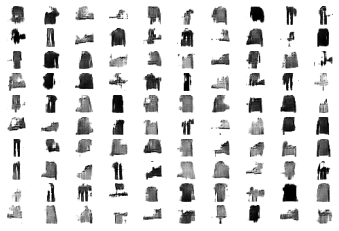

✬>11, 1/234, d1=0.692, d2=0.676 g=0.746<✬
✬>11, 2/234, d1=0.692, d2=0.674 g=0.748<✬
✬>11, 3/234, d1=0.696, d2=0.674 g=0.740<✬
✬>11, 4/234, d1=0.708, d2=0.687 g=0.741<✬
✬>11, 5/234, d1=0.703, d2=0.672 g=0.752<✬
✬>11, 6/234, d1=0.705, d2=0.660 g=0.765<✬
✬>11, 7/234, d1=0.709, d2=0.669 g=0.758<✬
✬>11, 8/234, d1=0.717, d2=0.657 g=0.758<✬
✬>11, 9/234, d1=0.722, d2=0.674 g=0.754<✬
✬>11, 10/234, d1=0.708, d2=0.675 g=0.740<✬
✬>11, 11/234, d1=0.702, d2=0.674 g=0.734<✬
✬>11, 12/234, d1=0.705, d2=0.675 g=0.735<✬
✬>11, 13/234, d1=0.694, d2=0.682 g=0.726<✬
✬>11, 14/234, d1=0.690, d2=0.688 g=0.731<✬
✬>11, 15/234, d1=0.704, d2=0.688 g=0.734<✬
✬>11, 16/234, d1=0.683, d2=0.682 g=0.742<✬
✬>11, 17/234, d1=0.704, d2=0.678 g=0.736<✬
✬>11, 18/234, d1=0.715, d2=0.677 g=0.741<✬
✬>11, 19/234, d1=0.708, d2=0.685 g=0.735<✬
✬>11, 20/234, d1=0.692, d2=0.681 g=0.727<✬
✬>11, 21/234, d1=0.708, d2=0.681 g=0.739<✬
✬>11, 22/234, d1=0.686, d2=0.689 g=0.739<✬
✬>11, 23/234, d1=0.677, d2=0.685 g=0.750<✬
✬>11, 24/234, d1=0.7

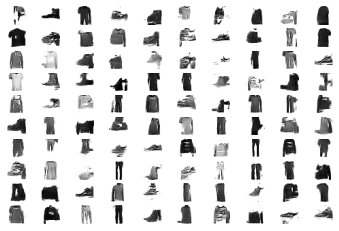

✬>21, 1/234, d1=0.702, d2=0.682 g=0.714<✬
✬>21, 2/234, d1=0.694, d2=0.693 g=0.720<✬
✬>21, 3/234, d1=0.694, d2=0.685 g=0.712<✬
✬>21, 4/234, d1=0.690, d2=0.674 g=0.721<✬
✬>21, 5/234, d1=0.704, d2=0.677 g=0.722<✬
✬>21, 6/234, d1=0.694, d2=0.685 g=0.722<✬
✬>21, 7/234, d1=0.711, d2=0.677 g=0.723<✬
✬>21, 8/234, d1=0.707, d2=0.692 g=0.713<✬
✬>21, 9/234, d1=0.696, d2=0.693 g=0.718<✬
✬>21, 10/234, d1=0.698, d2=0.687 g=0.716<✬
✬>21, 11/234, d1=0.695, d2=0.689 g=0.714<✬
✬>21, 12/234, d1=0.685, d2=0.696 g=0.711<✬
✬>21, 13/234, d1=0.691, d2=0.695 g=0.709<✬
✬>21, 14/234, d1=0.702, d2=0.683 g=0.710<✬
✬>21, 15/234, d1=0.694, d2=0.694 g=0.714<✬
✬>21, 16/234, d1=0.694, d2=0.692 g=0.711<✬
✬>21, 17/234, d1=0.697, d2=0.686 g=0.709<✬
✬>21, 18/234, d1=0.689, d2=0.688 g=0.708<✬
✬>21, 19/234, d1=0.692, d2=0.691 g=0.710<✬
✬>21, 20/234, d1=0.688, d2=0.690 g=0.713<✬
✬>21, 21/234, d1=0.685, d2=0.685 g=0.707<✬
✬>21, 22/234, d1=0.695, d2=0.695 g=0.709<✬
✬>21, 23/234, d1=0.696, d2=0.700 g=0.710<✬
✬>21, 24/234, d1=0.6

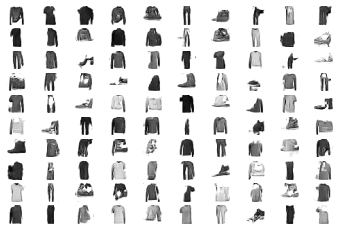

✬>31, 1/234, d1=0.690, d2=0.689 g=0.719<✬
✬>31, 2/234, d1=0.692, d2=0.699 g=0.706<✬
✬>31, 3/234, d1=0.681, d2=0.717 g=0.706<✬
✬>31, 4/234, d1=0.689, d2=0.710 g=0.700<✬
✬>31, 5/234, d1=0.694, d2=0.703 g=0.708<✬
✬>31, 6/234, d1=0.689, d2=0.698 g=0.711<✬
✬>31, 7/234, d1=0.692, d2=0.689 g=0.726<✬
✬>31, 8/234, d1=0.697, d2=0.674 g=0.738<✬
✬>31, 9/234, d1=0.709, d2=0.674 g=0.735<✬
✬>31, 10/234, d1=0.691, d2=0.680 g=0.729<✬
✬>31, 11/234, d1=0.700, d2=0.687 g=0.715<✬
✬>31, 12/234, d1=0.703, d2=0.697 g=0.711<✬
✬>31, 13/234, d1=0.696, d2=0.696 g=0.704<✬
✬>31, 14/234, d1=0.693, d2=0.694 g=0.713<✬
✬>31, 15/234, d1=0.687, d2=0.685 g=0.724<✬
✬>31, 16/234, d1=0.690, d2=0.684 g=0.721<✬
✬>31, 17/234, d1=0.692, d2=0.701 g=0.711<✬
✬>31, 18/234, d1=0.691, d2=0.707 g=0.703<✬
✬>31, 19/234, d1=0.676, d2=0.705 g=0.691<✬
✬>31, 20/234, d1=0.678, d2=0.707 g=0.692<✬
✬>31, 21/234, d1=0.684, d2=0.711 g=0.698<✬
✬>31, 22/234, d1=0.685, d2=0.705 g=0.706<✬
✬>31, 23/234, d1=0.690, d2=0.691 g=0.717<✬
✬>31, 24/234, d1=0.7

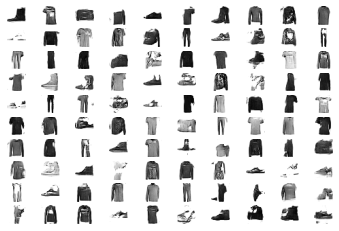

✬>41, 1/234, d1=0.693, d2=0.695 g=0.705<✬
✬>41, 2/234, d1=0.688, d2=0.701 g=0.706<✬
✬>41, 3/234, d1=0.685, d2=0.691 g=0.705<✬
✬>41, 4/234, d1=0.695, d2=0.692 g=0.706<✬
✬>41, 5/234, d1=0.686, d2=0.694 g=0.707<✬
✬>41, 6/234, d1=0.691, d2=0.693 g=0.713<✬
✬>41, 7/234, d1=0.694, d2=0.698 g=0.709<✬
✬>41, 8/234, d1=0.691, d2=0.692 g=0.705<✬
✬>41, 9/234, d1=0.706, d2=0.694 g=0.709<✬
✬>41, 10/234, d1=0.693, d2=0.694 g=0.707<✬
✬>41, 11/234, d1=0.692, d2=0.691 g=0.707<✬
✬>41, 12/234, d1=0.701, d2=0.698 g=0.705<✬
✬>41, 13/234, d1=0.691, d2=0.696 g=0.703<✬
✬>41, 14/234, d1=0.687, d2=0.696 g=0.700<✬
✬>41, 15/234, d1=0.696, d2=0.699 g=0.710<✬
✬>41, 16/234, d1=0.704, d2=0.700 g=0.706<✬
✬>41, 17/234, d1=0.689, d2=0.693 g=0.707<✬
✬>41, 18/234, d1=0.695, d2=0.686 g=0.714<✬
✬>41, 19/234, d1=0.698, d2=0.686 g=0.715<✬
✬>41, 20/234, d1=0.700, d2=0.684 g=0.718<✬
✬>41, 21/234, d1=0.694, d2=0.684 g=0.717<✬
✬>41, 22/234, d1=0.703, d2=0.690 g=0.710<✬
✬>41, 23/234, d1=0.703, d2=0.693 g=0.713<✬
✬>41, 24/234, d1=0.6

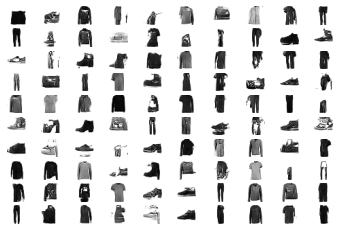

In [ ]:
# example of training an unconditional gan on the fashion mnist dataset
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1)):
  model = Sequential()
  # downsample
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
  model.add(LeakyReLU(alpha=0.2))
  # downsample
  model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # classifier
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model
# define the standalone generator model
def define_generator(latent_dim):
  model = Sequential()
  # foundation for 7x7 image
  n_nodes = 128 * 7 * 7
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((7, 7, 128)))
  # upsample to 14x14
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 28x28
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # generate
  model.add(Conv2D(1, (7,7), activation='tanh', padding='same'))
  return model
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
  # make weights in the discriminator not trainable
  discriminator.trainable = False
  # connect them
  model = Sequential()
  # add generator
  model.add(generator)
  # add the discriminator
  model.add(discriminator)
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model
# load fashion mnist images
def load_real_samples():
  # load dataset
  (trainX, _), (_, _) = load_data()
  # expand to 3d, e.g. add channels
  X = expand_dims(trainX, axis=-1)
  # convert from ints to floats
  X = X.astype('float32')
  # scale from [0,255] to [-1,1]
  X = (X - 127.5) / 127.5
  return X
# select real samples
def generate_real_samples(dataset, n_samples):
  # choose random instances
  ix = randint(0, dataset.shape[0], n_samples)
  # select images
  X = dataset[ix]
  # generate class labels
  y = ones((n_samples, 1))
  return X, y
  # generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input
  # use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
  # generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  X = generator.predict(x_input)
  # create class labels
  y = zeros((n_samples, 1))
  return X, y
# create a plot of generated images (reversed grayscale)
def plot_generated(examples, n):
  %matplotlib inline
  # plot images
  for i in range(n * n):
    # define subplot
    pyplot.subplot(n, n, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
  pyplot.show()
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=50, n_batch=256):
  bat_per_epo = int(dataset.shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
      # get randomly selected ✬real✬ samples
      X_real, y_real = generate_real_samples(dataset, half_batch)
      # update discriminator model weights
      d_loss1, _ = d_model.train_on_batch(X_real, y_real)
      # generate ✬fake✬ examples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      # update discriminator model weights
      d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
      # prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan = ones((n_batch, 1))
      # update the generator via the discriminator✬s error
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      # summarize loss on this batch
      print('✬>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f<✬' %(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
    if (i+1) % 10 == 0:
      latent_points = generate_latent_points(100, 100)
      X = g_model.predict(latent_points)
      plot_generated(X, 10)
  
  # save the generator model
  #g_model.save('generator.h5')

# size of the latent space
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# load image data
dataset = load_real_samples()
# train model
train(generator, discriminator, gan_model, dataset, latent_dim)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


✬>1, 1/78, d1=0.649, d2=0.696 g=0.691✬
✬>1, 2/78, d1=0.575, d2=0.700 g=0.687✬
✬>1, 3/78, d1=0.515, d2=0.707 g=0.681✬
✬>1, 4/78, d1=0.464, d2=0.719 g=0.670✬
✬>1, 5/78, d1=0.411, d2=0.736 g=0.657✬
✬>1, 6/78, d1=0.362, d2=0.758 g=0.641✬
✬>1, 7/78, d1=0.318, d2=0.784 g=0.626✬
✬>1, 8/78, d1=0.293, d2=0.809 g=0.617✬
✬>1, 9/78, d1=0.259, d2=0.819 g=0.626✬
✬>1, 10/78, d1=0.252, d2=0.795 g=0.662✬
✬>1, 11/78, d1=0.250, d2=0.736 g=0.727✬
✬>1, 12/78, d1=0.250, d2=0.658 g=0.833✬
✬>1, 13/78, d1=0.263, d2=0.563 g=0.951✬
✬>1, 14/78, d1=0.277, d2=0.496 g=1.036✬
✬>1, 15/78, d1=0.272, d2=0.480 g=1.028✬
✬>1, 16/78, d1=0.288, d2=0.523 g=0.934✬
✬>1, 17/78, d1=0.257, d2=0.583 g=0.839✬
✬>1, 18/78, d1=0.262, d2=0.644 g=0.761✬
✬>1, 19/78, d1=0.221, d2=0.717 g=0.688✬
✬>1, 20/78, d1=0.230, d2=0.830 g=0.608✬
✬>1, 21/78, d1=0.191, d2=0.988 g=0.527✬
✬>1, 22/78, d1=0.186, d2=1.117 g=0.485✬
✬>1, 23/78, d1=0.178, d2=1.107 g=0.517✬
✬>1, 24/78, d1=0.160, d2=0.957 g=0.612✬
✬>1, 25/78, d1=0.116, d2=0.784 g=0.750✬
✬>1, 26/7

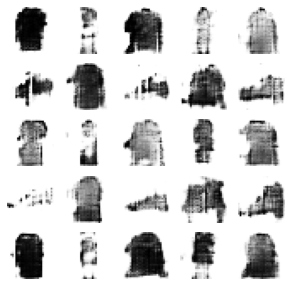

✬>21, 1/78, d1=0.696, d2=0.674 g=0.765✬
✬>21, 2/78, d1=0.674, d2=0.669 g=0.767✬
✬>21, 3/78, d1=0.670, d2=0.670 g=0.761✬
✬>21, 4/78, d1=0.656, d2=0.662 g=0.763✬
✬>21, 5/78, d1=0.654, d2=0.671 g=0.754✬
✬>21, 6/78, d1=0.658, d2=0.687 g=0.751✬
✬>21, 7/78, d1=0.662, d2=0.703 g=0.741✬
✬>21, 8/78, d1=0.675, d2=0.701 g=0.754✬
✬>21, 9/78, d1=0.663, d2=0.688 g=0.762✬
✬>21, 10/78, d1=0.691, d2=0.667 g=0.780✬
✬>21, 11/78, d1=0.675, d2=0.651 g=0.789✬
✬>21, 12/78, d1=0.681, d2=0.647 g=0.793✬
✬>21, 13/78, d1=0.690, d2=0.651 g=0.785✬
✬>21, 14/78, d1=0.700, d2=0.659 g=0.768✬
✬>21, 15/78, d1=0.701, d2=0.670 g=0.766✬
✬>21, 16/78, d1=0.674, d2=0.672 g=0.761✬
✬>21, 17/78, d1=0.677, d2=0.676 g=0.757✬
✬>21, 18/78, d1=0.671, d2=0.676 g=0.753✬
✬>21, 19/78, d1=0.663, d2=0.674 g=0.762✬
✬>21, 20/78, d1=0.663, d2=0.673 g=0.755✬
✬>21, 21/78, d1=0.656, d2=0.678 g=0.759✬
✬>21, 22/78, d1=0.648, d2=0.687 g=0.736✬
✬>21, 23/78, d1=0.653, d2=0.702 g=0.737✬
✬>21, 24/78, d1=0.664, d2=0.688 g=0.751✬
✬>21, 25/78, d1=0.676, d2

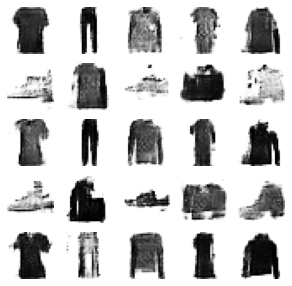

✬>41, 1/78, d1=0.669, d2=0.681 g=0.763✬
✬>41, 2/78, d1=0.688, d2=0.658 g=0.784✬
✬>41, 3/78, d1=0.694, d2=0.661 g=0.772✬
✬>41, 4/78, d1=0.699, d2=0.669 g=0.764✬
✬>41, 5/78, d1=0.690, d2=0.673 g=0.755✬
✬>41, 6/78, d1=0.686, d2=0.663 g=0.753✬
✬>41, 7/78, d1=0.691, d2=0.670 g=0.753✬
✬>41, 8/78, d1=0.672, d2=0.672 g=0.768✬
✬>41, 9/78, d1=0.695, d2=0.672 g=0.756✬
✬>41, 10/78, d1=0.672, d2=0.673 g=0.752✬
✬>41, 11/78, d1=0.666, d2=0.691 g=0.749✬
✬>41, 12/78, d1=0.686, d2=0.678 g=0.754✬
✬>41, 13/78, d1=0.686, d2=0.663 g=0.770✬
✬>41, 14/78, d1=0.675, d2=0.661 g=0.777✬
✬>41, 15/78, d1=0.687, d2=0.659 g=0.770✬
✬>41, 16/78, d1=0.690, d2=0.673 g=0.756✬
✬>41, 17/78, d1=0.692, d2=0.681 g=0.752✬
✬>41, 18/78, d1=0.694, d2=0.679 g=0.752✬
✬>41, 19/78, d1=0.688, d2=0.667 g=0.757✬
✬>41, 20/78, d1=0.674, d2=0.668 g=0.771✬
✬>41, 21/78, d1=0.680, d2=0.670 g=0.757✬
✬>41, 22/78, d1=0.672, d2=0.696 g=0.734✬
✬>41, 23/78, d1=0.655, d2=0.695 g=0.734✬
✬>41, 24/78, d1=0.676, d2=0.698 g=0.753✬
✬>41, 25/78, d1=0.681, d2

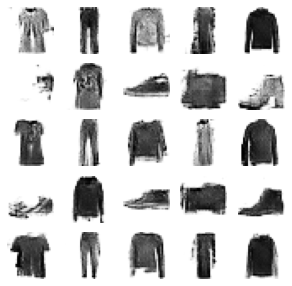

✬>61, 1/78, d1=0.683, d2=0.668 g=0.762✬
✬>61, 2/78, d1=0.697, d2=0.676 g=0.751✬
✬>61, 3/78, d1=0.690, d2=0.680 g=0.739✬
✬>61, 4/78, d1=0.683, d2=0.681 g=0.740✬
✬>61, 5/78, d1=0.680, d2=0.679 g=0.746✬
✬>61, 6/78, d1=0.681, d2=0.680 g=0.740✬
✬>61, 7/78, d1=0.688, d2=0.680 g=0.740✬
✬>61, 8/78, d1=0.688, d2=0.691 g=0.729✬
✬>61, 9/78, d1=0.671, d2=0.682 g=0.744✬
✬>61, 10/78, d1=0.674, d2=0.684 g=0.756✬
✬>61, 11/78, d1=0.688, d2=0.674 g=0.756✬
✬>61, 12/78, d1=0.691, d2=0.667 g=0.750✬
✬>61, 13/78, d1=0.696, d2=0.677 g=0.743✬
✬>61, 14/78, d1=0.701, d2=0.682 g=0.738✬
✬>61, 15/78, d1=0.692, d2=0.675 g=0.749✬
✬>61, 16/78, d1=0.686, d2=0.675 g=0.750✬
✬>61, 17/78, d1=0.682, d2=0.681 g=0.746✬
✬>61, 18/78, d1=0.686, d2=0.674 g=0.739✬
✬>61, 19/78, d1=0.683, d2=0.690 g=0.747✬
✬>61, 20/78, d1=0.679, d2=0.681 g=0.747✬
✬>61, 21/78, d1=0.693, d2=0.672 g=0.755✬
✬>61, 22/78, d1=0.693, d2=0.674 g=0.745✬
✬>61, 23/78, d1=0.690, d2=0.681 g=0.738✬
✬>61, 24/78, d1=0.683, d2=0.675 g=0.747✬
✬>61, 25/78, d1=0.696, d2

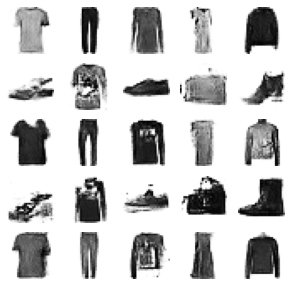

✬>81, 1/78, d1=0.677, d2=0.687 g=0.731✬
✬>81, 2/78, d1=0.673, d2=0.692 g=0.738✬
✬>81, 3/78, d1=0.686, d2=0.684 g=0.742✬
✬>81, 4/78, d1=0.686, d2=0.679 g=0.745✬
✬>81, 5/78, d1=0.699, d2=0.673 g=0.745✬
✬>81, 6/78, d1=0.692, d2=0.675 g=0.740✬
✬>81, 7/78, d1=0.692, d2=0.682 g=0.734✬
✬>81, 8/78, d1=0.690, d2=0.669 g=0.735✬
✬>81, 9/78, d1=0.689, d2=0.675 g=0.740✬
✬>81, 10/78, d1=0.692, d2=0.682 g=0.740✬
✬>81, 11/78, d1=0.685, d2=0.677 g=0.731✬
✬>81, 12/78, d1=0.683, d2=0.691 g=0.740✬
✬>81, 13/78, d1=0.687, d2=0.677 g=0.735✬
✬>81, 14/78, d1=0.693, d2=0.676 g=0.739✬
✬>81, 15/78, d1=0.687, d2=0.678 g=0.744✬
✬>81, 16/78, d1=0.687, d2=0.683 g=0.748✬
✬>81, 17/78, d1=0.689, d2=0.685 g=0.742✬
✬>81, 18/78, d1=0.682, d2=0.685 g=0.735✬
✬>81, 19/78, d1=0.684, d2=0.678 g=0.742✬
✬>81, 20/78, d1=0.676, d2=0.680 g=0.745✬
✬>81, 21/78, d1=0.681, d2=0.674 g=0.744✬
✬>81, 22/78, d1=0.675, d2=0.684 g=0.746✬
✬>81, 23/78, d1=0.684, d2=0.677 g=0.745✬
✬>81, 24/78, d1=0.689, d2=0.664 g=0.753✬
✬>81, 25/78, d1=0.692, d2

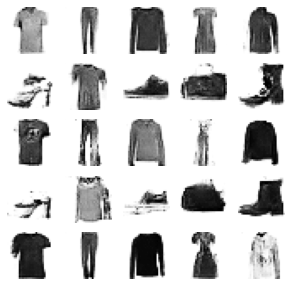

In [ ]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate
# example of loading the generator model and generating images
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot

# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1), n_classes=10):
  ############################################ input 1
  # label input
  in_label = Input(shape=(1,))
  # embedding for categorical input
  li = Embedding(n_classes, 50)(in_label)
  # scale up to image dimensions with linear activation
  n_nodes = in_shape[0] * in_shape[1]
  li = Dense(n_nodes)(li)
  # reshape to additional channel
  li = Reshape((in_shape[0], in_shape[1], 1))(li)
  #####################################################
  
  # image input################################ input 2
  in_image = Input(shape=in_shape)
  #####################################################

  # input 1 is an embedding that represents of the class labels(in_label) and the 
  # no of classes spread over 50 dims, it is then passed through a dense layer
  #(which has enough nodes to be reshaped into the size of input images) and then
  # it is finally reshaped.
  # input 2 is the original image from the dataset


  # concat label as a channel
  merge = Concatenate()([in_image, li])
  # downsample
  fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
  fe = LeakyReLU(alpha=0.2)(fe)
  # downsample
  fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  # flatten feature maps
  fe = Flatten()(fe)
  # dropout
  fe = Dropout(0.4)(fe)
  # output
  out_layer = Dense(1, activation='sigmoid')(fe)
  # define model
  model = Model([in_image, in_label], out_layer)
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
  return model

# define the standalone generator model
def define_generator(latent_dim, n_classes=10):
  # label input########################### input 1
  in_label = Input(shape=(1,))
  # embedding for categorical input
  li = Embedding(n_classes, 50)(in_label)
  # linear multiplication
  n_nodes = 7 * 7
  li = Dense(n_nodes)(li)
  # reshape to additional channel
  li = Reshape((7, 7, 1))(li)
  ################################################

  # image generator input################# input 2
  in_lat = Input(shape=(latent_dim,))
  # foundation for 7x7 image
  n_nodes = 128 * 7 * 7
  gen = Dense(n_nodes)(in_lat)
  gen = LeakyReLU(alpha=0.2)(gen)
  gen = Reshape((7, 7, 128))(gen)
  ################################################

  # merge image gen and label input
  merge = Concatenate()([gen, li])
  # upsample to 14x14
  gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
  gen = LeakyReLU(alpha=0.2)(gen)
  # upsample to 28x28
  gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
  gen = LeakyReLU(alpha=0.2)(gen)
  # output
  out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
  # define model
  model = Model([in_lat, in_label], out_layer)
  return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
  # make weights in the discriminator not trainable
  d_model.trainable = False
  # get noise and label inputs from generator model
  gen_noise, gen_label = g_model.input
  # get image output from the generator model
  gen_output = g_model.output
  # connect image output and label input from generator as inputs to discriminator
  gan_output = d_model([gen_output, gen_label])
  # define gan model as taking noise and label and outputting a classification
  model = Model([gen_noise, gen_label], gan_output)
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

# load fashion mnist images
def load_real_samples():
  # load dataset
  (trainX, trainy), (_, _) = load_data()
  # expand to 3d, e.g. add channels
  X = expand_dims(trainX, axis=-1)
  # convert from ints to floats
  X = X.astype('float32')
  # scale from [0,255] to [-1,1]
  X = (X - 127.5) / 127.5
  return [X, trainy]
# select real samples
def generate_real_samples(dataset, n_samples):
  # split into images and labels
  images, labels = dataset
  # choose random instances
  ix = randint(0, images.shape[0], n_samples)
  # select images and labels
  X, labels = images[ix], labels[ix]
  # generate class labels
  y = ones((n_samples, 1))
  return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  z_input = x_input.reshape(n_samples, latent_dim)
  # generate labels
  labels = randint(0, n_classes, n_samples)
  return [z_input, labels]
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
  # generate points in latent space
  z_input, labels_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  images = generator.predict([z_input, labels_input])
  # create class labels
  y = zeros((n_samples, 1))
  return [images, labels_input], y

# create and save a plot of generated images
def save_plot(examples, n):
  %matplotlib inline
  # plot images
  for i in range(n * n):
    # define subplot
    pyplot.subplot(n, n, 1 + i)
    pyplot.gcf().set_size_inches(5,5)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
  pyplot.show()


# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=768):
  bat_per_epo = int(dataset[0].shape[0] / n_batch)
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_epochs):
    # enumerate batches over the training set
    for j in range(bat_per_epo):
      # get randomly selected ✬real✬ samples
      [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
      # update discriminator model weights
      d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
      # generate ✬fake✬ examples
      [X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      # update discriminator model weights
      d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
      # prepare points in latent space as input for the generator
      [z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
      # create inverted labels for the fake samples
      y_gan = ones((n_batch, 1))
      # update the generator via the discriminator✬s error
      g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
      # summarize loss on this batch
      print('✬>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f✬' %
      (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
    if (i+1)%20==0:
      latent_points, labels = generate_latent_points(100, 100)
      # specify labels
      labels = asarray([x for _ in range(10) for x in range(10)])
      # generate images
      X = g_model.predict([latent_points, labels])
      save_plot(X, 5)




  # save the generator model
  #g_model.save('cgan_generator.h5')

# size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)



## INFOGAN
provide control variables as input to the generator, along with the point in latent space (noise). The generator can be trained to use the control variables to influence specific properties of the generated images. This is the approach taken with the Information Maximizing Generative Adversarial Network, or InfoGAN for short.For example, if we want to produce specific MNIST digits, we need to feed a categorical vector containing integers from 0 to 9; if we want to produce MNIST digits with different rotational angles, we may want to feed float numbers randomly selected between -1 to 1.
We create a penalty/loss function to ensure that the generator models uses the additional information.

Categorical control variables: Example label for classes in the MNIST set.(abstract)
Continuous control variables: Example rotation angle of digits, thickness.(abstract)

A third model(auxiliary/Q model) similar to the discriminator is trained but instead of predicting real or fake it predicts which features of the image were taken into consideration, i.e takes fake images and reproduces the additional information we fed into the generator. using this model a loss function is created which calculates the loss/difference between the predicted image and real image, so that the model can be nudged towards the real features(which we want to be highlighted in the generated images) instead of intermediate features(features taken into consideration but dont really have much importance).
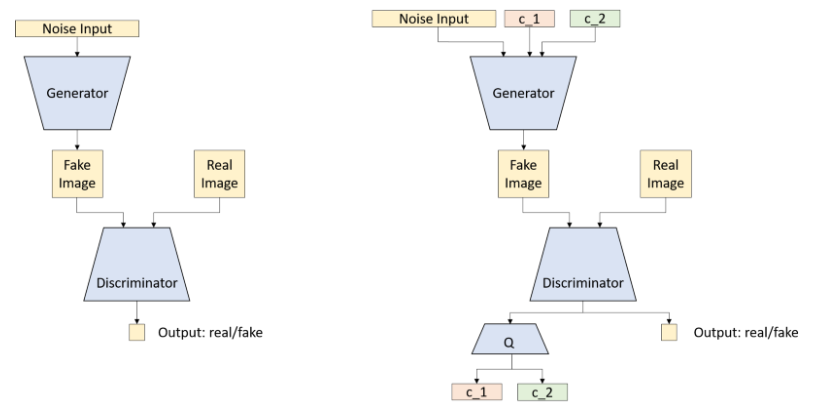




In [ ]:
# create and plot the infogan model for mnist
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.initializers import RandomNormal
from keras.utils.vis_utils import plot_model
# example of training an infogan on mnist
from numpy import zeros
from numpy import ones
from numpy import expand_dims
from numpy import hstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from tensorflow.keras.utils import to_categorical
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import Activation
from matplotlib import pyplot
%matplotlib inline
# define the standalone discriminator model
def define_discriminator(n_cat, in_shape=(28,28,1)):
  # weight initialization
  init = RandomNormal(stddev=0.02)
  # image input
  in_image = Input(shape=in_shape)
  # downsample to 14x14
  d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
  d = LeakyReLU(alpha=0.1)(d)
  # downsample to 7x7
  d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
  d = LeakyReLU(alpha=0.1)(d)
  d = BatchNormalization()(d)
  # normal
  d = Conv2D(256, (4,4), padding='same', kernel_initializer=init)(d)
  d = LeakyReLU(alpha=0.1)(d)
  d = BatchNormalization()(d)
  # flatten feature maps
  d = Flatten()(d)
  # real/fake output
  out_classifier = Dense(1, activation='sigmoid')(d)
  # define d model
  d_model = Model(in_image, out_classifier)
  # compile d model
  d_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
  # create q model layers
  q = Dense(128)(d)
  q = BatchNormalization()(q)
  q = LeakyReLU(alpha=0.1)(q)
  # q model output
  out_codes = Dense(n_cat, activation='softmax')(q)
  # define q model
  q_model = Model(in_image, out_codes)
  return d_model, q_model

# define the standalone generator model
def define_generator(gen_input_size):
  # weight initialization
  init = RandomNormal(stddev=0.02)
  # image generator input
  in_lat = Input(shape=(gen_input_size,))
  # foundation for 7x7 image
  n_nodes = 512 * 7 * 7
  gen = Dense(n_nodes, kernel_initializer=init)(in_lat)
  gen = Activation('relu')(gen)
  gen = BatchNormalization()(gen)
  gen = Reshape((7, 7, 512))(gen)
  # normal
  gen = Conv2D(128, (4,4), padding='same', kernel_initializer=init)(gen)
  gen = Activation('relu')(gen)
  gen = BatchNormalization()(gen)
  # upsample to 14x14
  gen = Conv2DTranspose(64, (4,4), strides=(2,2), padding='same',kernel_initializer=init)(gen)
  gen = Activation('relu')(gen)
  gen = BatchNormalization()(gen)
  # upsample to 28x28
  gen = Conv2DTranspose(1, (4,4), strides=(2,2), padding='same',kernel_initializer=init)(gen)
  # tanh output
  out_layer = Activation('tanh')(gen)
  # define model
  model = Model(in_lat, out_layer)
  return model
# define the combined discriminator, generator and q network model
def define_gan(g_model, d_model, q_model):
  # make weights in the discriminator (some shared with the q model) as not trainable
  d_model.trainable = False
  # connect g outputs to d inputs
  d_output = d_model(g_model.output)
  # connect g outputs to q inputs
  q_output = q_model(g_model.output)
  # define composite model
  model = Model(g_model.input, [d_output, q_output])
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss=['binary_crossentropy', 'categorical_crossentropy'], optimizer=opt)
  return model

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_cat, n_samples):
  # generate points in the latent space
  z_latent = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  z_latent = z_latent.reshape(n_samples, latent_dim)
  # generate categorical codes
  cat_codes = randint(0, n_cat, n_samples)
  # one hot encode
  cat_codes = to_categorical(cat_codes, num_classes=n_cat)
  # concatenate latent points and control codes
  z_input = hstack((z_latent, cat_codes))
  return [z_input, cat_codes]

# load images
def load_real_samples():
  # load dataset
  (trainX, _), (_, _) = load_data()
  # expand to 3d, e.g. add channels
  X = expand_dims(trainX, axis=-1)
  # convert from ints to floats
  X = X.astype('float32')
  # scale from [0,255] to [-1,1]
  X = (X - 127.5) / 127.5
  print(X.shape)
  return X

def generate_real_samples(dataset, n_samples):
  # choose random instances
  ix = randint(0, dataset.shape[0], n_samples)
  # select images and labels
  X = dataset[ix]
  # generate class labels
  y = ones((n_samples, 1))
  return X, y

# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_cat, n_samples):
  # generate points in latent space and control codes
  z_input, _ = generate_latent_points(latent_dim, n_cat, n_samples)
  # predict outputs
  images = generator.predict(z_input)
  # create class labels
  y = zeros((n_samples, 1))
  return images, y

# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, gan_model, latent_dim, n_cat, n_samples=100):
  # prepare fake examples
  X, _ = generate_fake_samples(g_model, latent_dim, n_cat, n_samples)
  # scale from [-1,1] to [0,1]
  X = (X + 1) / 2.0
  # plot images
  for i in range(100):
    # define subplot
    pyplot.subplot(10, 10, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
  # save plot to file
  #filename1 = ✬generated_plot_%04d.png✬ % (step+1)
  #pyplot.savefig(filename1)
  #pyplot.close()
  ## save the generator model
  #filename2 = ✬model_%04d.h5✬ % (step+1)
  #g_model.save(filename2)
  # save the gan model
  #filename3 = ✬gan_model_%04d.h5✬ % (step+1)
  #gan_model.save(filename3)
  #print(✬>Saved: %s, %s, and %s✬ % (filename1, filename2, filename3))

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_cat, n_epochs=100,n_batch=1024):
  # calculate the number of batches per training epoch
  bat_per_epo = int(dataset.shape[0] / n_batch)
  # calculate the number of training iterations
  n_steps = bat_per_epo * n_epochs
  # calculate the size of half a batch of samples
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_steps):
    # get randomly selected ✬real✬ samples
    X_real, y_real = generate_real_samples(dataset, half_batch)
    # update discriminator and q model weights
    d_loss1 = d_model.train_on_batch(X_real, y_real)
    # generate ✬fake✬ examples
    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_cat, half_batch)
    # update discriminator model weights
    d_loss2 = d_model.train_on_batch(X_fake, y_fake)
    # prepare points in latent space as input for the generator
    z_input, cat_codes = generate_latent_points(latent_dim, n_cat, n_batch)
    # create inverted labels for the fake samples
    y_gan = ones((n_batch, 1))
    # update the g via the d and q error
    x,g_1,g_2 = gan_model.train_on_batch(z_input, [y_gan, cat_codes])
    # summarize loss on this batch
    print("GAN LOSS : ",x)
    print('✬>Step : %d, Discriminator Loss(Real,Fake) : d[%.3f,%.3f], Generator Loss : g[%.3f], Aux Model Loss : q[%.3f]<✬' % (i+1, d_loss1, d_loss2, g_1, g_2))
    # evaluate the model performance every ✬epoch✬
    if (i+1) % 500 == 0:
      summarize_performance(i, g_model, gan_model, latent_dim, n_cat)

# number of values for the categorical control code
n_cat = 10
# size of the latent space
latent_dim = 62
# create the discriminator
d_model, q_model = define_discriminator(n_cat)
# create the generator
gen_input_size = latent_dim + n_cat
g_model = define_generator(gen_input_size)
# create the gan
gan_model = define_gan(g_model, d_model, q_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim, n_cat)

from math import sqrt
from numpy import asarray
from numpy import hstack
from numpy.random import randn
from keras.models import load_model
from keras.utils import to_categorical
from matplotlib import pyplot
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_cat, n_samples, digit):
  # generate points in the latent space
  z_latent = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  z_latent = z_latent.reshape(n_samples, latent_dim)
  # define categorical codes
  cat_codes = asarray([digit for _ in range(n_samples)])
  # one hot encode
  cat_codes = to_categorical(cat_codes, num_classes=n_cat)
  # concatenate latent points and control codes
  z_input = hstack((z_latent, cat_codes))
  return [z_input, cat_codes]
# create and save a plot of generated images
def save_plot(examples, n_examples):
  # plot images
  for i in range(n_examples):
    # define subplot
    pyplot.subplot(sqrt(n_examples), sqrt(n_examples), 1 + i)
    # turn off axis
    pyplot.axis(✬off✬)
    # plot raw pixel data
    pyplot.imshow(examples[i, :, :, 0], cmap=✬gray_r✬)
  pyplot.show()
# load model
# model = load_model(✬model_93700.h5✬)
# # number of categorical control codes
# n_cat = 10
# # size of the latent space
# latent_dim = 62
# # number of examples to generate
# n_samples = 25
# # define digit
# digit = 1
# # generate points in latent space and control codes
# z_input, _ = generate_latent_points(latent_dim, n_cat, n_samples, digit)
# # predict outputs
# X = model.predict(z_input)
# # scale from [-1,1] to [0,1]
# X = (X + 1) / 2.0
# # plot the result
# save_plot(X, n_samples)



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


(60000, 28, 28, 1)
GAN LOSS :  3.0072689056396484
✬>Step : 1, Discriminator Loss(Real,Fake) : d[0.575,0.822], Generator Loss : g[0.691], Aux Model Loss : q[2.316]<✬
GAN LOSS :  2.978407382965088
✬>Step : 2, Discriminator Loss(Real,Fake) : d[0.000,0.580], Generator Loss : g[0.694], Aux Model Loss : q[2.285]<✬
GAN LOSS :  2.9596753120422363
✬>Step : 3, Discriminator Loss(Real,Fake) : d[0.000,0.413], Generator Loss : g[0.696], Aux Model Loss : q[2.263]<✬
GAN LOSS :  2.9336166381835938
✬>Step : 4, Discriminator Loss(Real,Fake) : d[0.000,0.279], Generator Loss : g[0.699], Aux Model Loss : q[2.235]<✬
GAN LOSS :  2.9073758125305176
✬>Step : 5, Discriminator Loss(Real,Fake) : d[0.000,0.163], Generator Loss : g[0.701], Aux Model Loss : q[2.206]<✬
GAN LOSS :  2.868242025375366
✬>Step : 6, Discriminator Loss(Real,Fake) : d[0.000,0.090], Generator Loss : g[0.703], Aux Model Loss : q[2.165]<✬
GAN LOSS :  2.811605453491211
✬>Step : 7, Discriminator Loss(Real,Fake) : d[0.000,0.050], Generator Loss : 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:170: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


GAN LOSS :  0.05106355994939804
✬>Step : 1001, Discriminator Loss(Real,Fake) : d[0.000,0.000], Generator Loss : g[0.046], Aux Model Loss : q[0.005]<✬
GAN LOSS :  0.05140864476561546
✬>Step : 1002, Discriminator Loss(Real,Fake) : d[0.000,0.000], Generator Loss : g[0.048], Aux Model Loss : q[0.004]<✬
GAN LOSS :  0.047767553478479385
✬>Step : 1003, Discriminator Loss(Real,Fake) : d[0.000,0.000], Generator Loss : g[0.045], Aux Model Loss : q[0.003]<✬
GAN LOSS :  0.04821933060884476
✬>Step : 1004, Discriminator Loss(Real,Fake) : d[0.000,0.000], Generator Loss : g[0.045], Aux Model Loss : q[0.003]<✬
GAN LOSS :  0.04725097119808197
✬>Step : 1005, Discriminator Loss(Real,Fake) : d[0.000,0.000], Generator Loss : g[0.044], Aux Model Loss : q[0.003]<✬
GAN LOSS :  0.04736841470003128
✬>Step : 1006, Discriminator Loss(Real,Fake) : d[0.000,0.000], Generator Loss : g[0.044], Aux Model Loss : q[0.003]<✬
GAN LOSS :  0.04567049816250801
✬>Step : 1007, Discriminator Loss(Real,Fake) : d[0.000,0.000], Gene

## Auxiliary Classifier GAN 
* Does not provide the label as input to the discriminator(like the conditional GAN) whereas it expects the discriminator to predict the class.The discriminator model must then predict whether the given image is real or fake as before, and must also predict the class label of the image.

❼ Generator Model:
– Input: Random point from the latent space, and the class label.

– Output: Generated image.

❼ Discriminator Model:
– Input: Image.

– Output: Probability that the provided image is real, probability of the image
belonging to each known class.i.e. two proobabilities
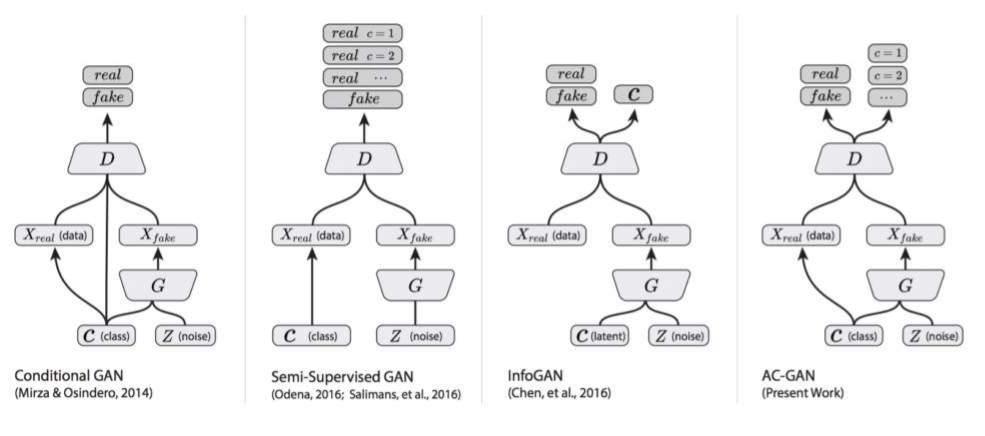



In [ ]:
# example of fitting an auxiliary classifier gan (ac-gan) on fashion mnsit
from numpy import zeros
from numpy import ones
from numpy import expand_dims
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Activation
from keras.layers import Concatenate
from keras.initializers import RandomNormal
from matplotlib import pyplot
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1), n_classes=10):
  # weight initialization
  init = RandomNormal(stddev=0.02)
  # image input
  in_image = Input(shape=in_shape)
  # downsample to 14x14
  fe = Conv2D(32, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
  fe = LeakyReLU(alpha=0.2)(fe)
  fe = Dropout(0.5)(fe)
  # normal
  fe = Conv2D(64, (3,3), padding='same', kernel_initializer=init)(fe)
  fe = BatchNormalization()(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  fe = Dropout(0.5)(fe)
  # downsample to 7x7
  fe = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(fe)
  fe = BatchNormalization()(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  fe = Dropout(0.5)(fe)
  # normal
  fe = Conv2D(256, (3,3), padding='same', kernel_initializer=init)(fe)
  fe = BatchNormalization()(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  fe = Dropout(0.5)(fe)
  # flatten feature maps
  fe = Flatten()(fe)
  # real/fake output
  out1 = Dense(1, activation='sigmoid')(fe)
  # class label output
  out2 = Dense(n_classes, activation='softmax')(fe)
  # define model
  model = Model(in_image, [out1, out2])
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'],optimizer=opt)
  return model


def define_generator(latent_dim, n_classes=10):
  # weight initialization
  init = RandomNormal(stddev=0.02)
  # label input
  in_label = Input(shape=(1,))
  # embedding for categorical input
  li = Embedding(n_classes, 50)(in_label)
  # linear multiplication
  n_nodes = 7 * 7
  li = Dense(n_nodes, kernel_initializer=init)(li)
  # reshape to additional channel
  li = Reshape((7, 7, 1))(li)
  # image generator input
  in_lat = Input(shape=(latent_dim,))
  # foundation for 7x7 image
  n_nodes = 384 * 7 * 7
  gen = Dense(n_nodes, kernel_initializer=init)(in_lat)
  gen = Activation('relu')(gen)
  gen = Reshape((7, 7, 384))(gen)
  # merge image gen and label input
  merge = Concatenate()([gen, li])
  # upsample to 14x14
  gen = Conv2DTranspose(192, (5,5), strides=(2,2), padding='same',kernel_initializer=init)(merge)
  gen = BatchNormalization()(gen)
  gen = Activation('relu')(gen)
  # upsample to 28x28
  gen = Conv2DTranspose(1, (5,5), strides=(2,2), padding='same',kernel_initializer=init)(gen)
  out_layer = Activation('tanh')(gen)
  # define model
  model = Model([in_lat, in_label], out_layer)
  return model

# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
  # make weights in the discriminator not trainable
  d_model.trainable = False
  # connect the outputs of the generator to the inputs of the discriminator
  gan_output = d_model(g_model.output)
  # define gan model as taking noise and label and outputting real/fake and label outputs
  model = Model(g_model.input, gan_output)
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss=['binary_crossentropy', 'sparse_categorical_crossentropy'],optimizer=opt)
  return model

# load images
def load_real_samples():
  # load dataset
  (trainX, trainy), (_, _) = load_data()
  # expand to 3d, e.g. add channels
  X = expand_dims(trainX, axis=-1)
  # convert from ints to floats
  X = X.astype('float32')
  # scale from [0,255] to [-1,1]
  X = (X - 127.5) / 127.5
  print(X.shape, trainy.shape)
  return [X, trainy]

# select real samples
def generate_real_samples(dataset, n_samples):
  # split into images and labels
  images, labels = dataset
  # choose random instances
  ix = randint(0, images.shape[0], n_samples)
  # select images and labels
  X, labels = images[ix], labels[ix]
  # generate class labels
  y = ones((n_samples, 1))
  return [X, labels], y

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=10):
  # generate points in the latent space
  x_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  z_input = x_input.reshape(n_samples, latent_dim)
  # generate labels
  labels = randint(0, n_classes, n_samples)
  return [z_input, labels]

# USE FOR CONDITIONAL GENERATION #
# # generate points in latent space as input for the generator
# def generate_latent_points(latent_dim, n_samples, n_class):
# # generate points in the latent space
# x_input = randn(latent_dim * n_samples)
# # reshape into a batch of inputs for the network
# z_input = x_input.reshape(n_samples, latent_dim)
# # generate labels
# labels = asarray([n_class for _ in range(n_samples)])
# return [z_input, labels]


# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
  # generate points in latent space
  z_input, labels_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  images = generator.predict([z_input, labels_input])
  # create class labels
  y = zeros((n_samples, 1))
  return [images, labels_input], y

# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, latent_dim, n_samples=100):
  # prepare fake examples
  [X, _], _ = generate_fake_samples(g_model, latent_dim, n_samples)
  # scale from [-1,1] to [0,1]
  #X = (X + 1) / 2.0
  # plot images
  for i in range(100):
    # define subplot
    pyplot.subplot(10, 10, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(X[i, :, :, 0], cmap='gray_r')

# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=64):
  # calculate the number of batches per training epoch
  bat_per_epo = int(dataset[0].shape[0] / n_batch)
  # calculate the number of training iterations
  n_steps = bat_per_epo * n_epochs
  # calculate the size of half a batch of samples
  half_batch = int(n_batch / 2)
  # manually enumerate epochs
  for i in range(n_steps):
    # get randomly selected ✬real✬ samples
    [X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
    # update discriminator model weights
    _,d_r1,d_r2 = d_model.train_on_batch(X_real, [y_real, labels_real])
    # generate ✬fake✬ examples
    [X_fake, labels_fake], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # update discriminator model weights
    _,d_f,d_f2 = d_model.train_on_batch(X_fake, [y_fake, labels_fake])
    # prepare points in latent space as input for the generator
    [z_input, z_labels] = generate_latent_points(latent_dim, n_batch)
    # create inverted labels for the fake samples
    y_gan = ones((n_batch, 1))
    # update the generator via the discriminator✬s error
    _,g_1,g_2 = gan_model.train_on_batch([z_input, z_labels], [y_gan, z_labels])
    # summarize loss on this batch
    print('>%d, dr[%.3f,%.3f], df[%.3f,%.3f], g[%.3f,%.3f]<' % (i+1, d_r1,d_r2, d_f,d_f2,g_1,g_2))
    # evaluate the model performance every ✬epoch✬
    if (i+1) % (bat_per_epo * 10) == 0:
      summarize_performance(i, g_model, latent_dim)

# size of the latent space
latent_dim = 100
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# load image data
dataset = load_real_samples()
# train model
train(generator, discriminator, gan_model, dataset, latent_dim)


## Semi Supervised GAN(SGAN)

One of the primary goals of this work is to improve the effectiveness of generative
adversarial networks for semi-supervised learning (improving the performance of
a supervised task, in this case, classification, by learning on additional unlabeled examples).

❼ Unsupervised Training: In the unsupervised mode, the discriminator is trained in the
same way as the traditional GAN, to predict whether the example is either real or fake.


❼ Supervised Training: In the supervised mode, the discriminator is trained to predict
the class label of real examples.



In [ ]:
# example of semi-supervised gan for mnist
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Lambda
from keras.layers import Activation
from matplotlib import pyplot
from keras import backend
# custom activation function
def custom_activation(output):
  logexpsum = backend.sum(backend.exp(output), axis=-1, keepdims=True)
  result = logexpsum / (logexpsum + 1.0)
  return result
# define the standalone supervised and unsupervised discriminator models
def define_discriminator(in_shape=(28,28,1), n_classes=10):
  # image input
  in_image = Input(shape=in_shape)
  # downsample
  fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(in_image)
  fe = LeakyReLU(alpha=0.2)(fe)
  # downsample
  fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  # downsample
  fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
  fe = LeakyReLU(alpha=0.2)(fe)
  # flatten feature maps
  fe = Flatten()(fe)
  # dropout
  fe = Dropout(0.4)(fe)
  # output layer nodes
  fe = Dense(n_classes)(fe)
  # supervised output
  c_out_layer = Activation('softmax')(fe)
  # define and compile supervised discriminator model
  c_model = Model(in_image, c_out_layer)
  c_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.0002,
  beta_1=0.5), metrics=['accuracy'])
  # unsupervised output
  d_out_layer = Lambda(custom_activation)(fe)
  # define and compile unsupervised discriminator model
  d_model = Model(in_image, d_out_layer)
  d_model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
  return d_model, c_model
# define the standalone generator model
def define_generator(latent_dim):
  # image generator input
  in_lat = Input(shape=(latent_dim,))
  # foundation for 7x7 image
  n_nodes = 128 * 7 * 7
  gen = Dense(n_nodes)(in_lat)
  gen = LeakyReLU(alpha=0.2)(gen)
  gen = Reshape((7, 7, 128))(gen)
  # upsample to 14x14
  gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
  gen = LeakyReLU(alpha=0.2)(gen)
  # upsample to 28x28
  gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
  gen = LeakyReLU(alpha=0.2)(gen)
  # output
  out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
  # define model
  model = Model(in_lat, out_layer)
  return model
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
  # make weights in the discriminator not trainable
  d_model.trainable = False
  # connect image output from generator as input to discriminator
  gan_output = d_model(g_model.output)
  # define gan model as taking noise and outputting a classification
  model = Model(g_model.input, gan_output)
  # compile model
  opt = Adam(lr=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model
# load the images
def load_real_samples():
  # load dataset
  (trainX, trainy), (_, _) = load_data()
  # expand to 3d, e.g. add channels
  X = expand_dims(trainX, axis=-1)
  # convert from ints to floats
  X = X.astype('float32')
  # scale from [0,255] to [-1,1]
  X = (X - 127.5) / 127.5
  print(X.shape, trainy.shape)
  return [X, trainy]
# select a supervised subset of the dataset, ensures classes are balanced
def select_supervised_samples(dataset, n_samples=100, n_classes=10):
  X, y = dataset
  X_list, y_list = list(), list()
  n_per_class = int(n_samples / n_classes)
  for i in range(n_classes):
    # get all images for this class
    X_with_class = X[y == i]
    # choose random instances
    ix = randint(0, len(X_with_class), n_per_class)
    # add to list
    [X_list.append(X_with_class[j]) for j in ix]
    [y_list.append(i) for j in ix]
  return asarray(X_list), asarray(y_list)
# select real samples
def generate_real_samples(dataset, n_samples):
  # split into images and labels
  images, labels = dataset
  # choose random instances
  ix = randint(0, images.shape[0], n_samples)
  # select images and labels
  X, labels = images[ix], labels[ix]
  # generate class labels
  y = ones((n_samples, 1))
  return [X, labels], y
  # generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  # generate points in the latent space
  z_input = randn(latent_dim * n_samples)
  # reshape into a batch of inputs for the network
  z_input = z_input.reshape(n_samples, latent_dim)
  return z_input
  # use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
  # generate points in latent space
  z_input = generate_latent_points(latent_dim, n_samples)
  # predict outputs
  images = generator.predict(z_input)
  # create class labels
  y = zeros((n_samples, 1))
  return images, y
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, c_model, latent_dim, dataset, n_samples=100):
  # prepare fake examples
  X, _ = generate_fake_samples(g_model, latent_dim, n_samples)
  # scale from [-1,1] to [0,1]
  X = (X + 1) / 2.0
  # plot images
  for i in range(100):
    # define subplot
    pyplot.subplot(10, 10, 1 + i)
    # turn off axis
    pyplot.axis('off')
    # plot raw pixel data
    pyplot.imshow(X[i, :, :, 0], cmap='gray_r')
  # save plot to file
  # filename1 = ✬generated_plot_%04d.png✬ % (step+1)
  # pyplot.savefig(filename1)
  # pyplot.close()
  # evaluate the classifier model
  X, y = dataset
  _, acc = c_model.evaluate(X, y, verbose=0)
  print('✬Classifier Accuracy: %.3f%%✬' % (acc * 100))
  
# train the generator and discriminator
def train(g_model, d_model, c_model, gan_model, dataset, latent_dim, n_epochs=20,n_batch=100):
  # select supervised dataset
  X_sup, y_sup = select_supervised_samples(dataset)
  print(X_sup.shape, y_sup.shape)
  # calculate the number of batches per training epoch
  bat_per_epo = int(dataset[0].shape[0] / n_batch)
  # calculate the number of training iterations
  n_steps = bat_per_epo * n_epochs
  # calculate the size of half a batch of samples
  half_batch = int(n_batch / 2)
  print(✬n_epochs=%d, n_batch=%d, 1/2=%d, b/e=%d, steps=%d✬ % (n_epochs, n_batch,
  half_batch, bat_per_epo, n_steps))
  # manually enumerate epochs
  for i in range(n_steps):
    # update supervised discriminator (c)
    [Xsup_real, ysup_real], _ = generate_real_samples([X_sup, y_sup], half_batch)
    c_loss, c_acc = c_model.train_on_batch(Xsup_real, ysup_real)
    # update unsupervised discriminator (d)
    [X_real, _], y_real = generate_real_samples(dataset, half_batch)
    d_loss1 = d_model.train_on_batch(X_real, y_real)
    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    d_loss2 = d_model.train_on_batch(X_fake, y_fake)
    # update generator (g)
    X_gan, y_gan = generate_latent_points(latent_dim, n_batch), ones((n_batch, 1))
    g_loss = gan_model.train_on_batch(X_gan, y_gan)
    # summarize loss on this batch
    print('✬>%d, c[%.3f,%.0f], d[%.3f,%.3f], g[%.3f]✬' % (i+1, c_loss, c_acc*100, d_loss1,d_loss2, g_loss))
    # evaluate the model performance every so often
  if (i+1) % (bat_per_epo * 1) == 0:
    summarize_performance(i, g_model, c_model, latent_dim, dataset)
# size of the latent space
latent_dim = 100
# create the discriminator models
d_model, c_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, c_model, gan_model, dataset, latent_dim)

# Images translation using CycleGAN Models

## BigGAN
GAN can only achieve to generate 64x64 images but scaling up GANs is now possible by using more model params, feature maps, larger batch size, higher image sizes during training. Self attention modules(in both disc and gen) and hinge loss, class conditional information, spectral loss, update dics more than gen, model weights moving average, orthogonal weight initialization, skip connections in generator model, during training orthogonal latent space while during inference truncation tricks are used, orthogonal weight regularization 
## Progressive Growing GAN
Progressive Growing GAN involves using a generator and discriminator model with the same general structure and starting with very small images, such as 4 × 4 pixels. During training, new blocks of convolutional layers are systematically added to both the generator model and
the discriminator models. The incremental addition of the layers allows the models to effectively learn coarse-level detail and later learn ever finer detail, both on the generator and discriminator side.
## StyleGAN
The generators continue to operate as black boxes, and despite recent efforts, the understanding of various aspects of the image synthesis process, is still lacking. The properties of the latent space are also poorly understood. In order to control the properties of generated images high-level features such as background and foreground, and fine-grained details such as the features of synthesized objects or subjects. This requires both disentangling features or properties in images and adding controls for these properties to the generator model. Baseline Progressive GAN.
❼ Addition of tuning and bilinear upsampling.
❼ Addition of mapping network and AdaIN (styles).
❼ Removal of latent vector input to generator.
❼ Addition of noise to each block.
❼ Addition Mixing regularization
